In [1]:
import numpy as np
import pandas as pd
import seaborn
import numdifftools as nd
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r'Assignment4Dataset.csv')

In [3]:
df.columns =['a','b','y']

In [4]:
df['a2'] = df['a']**2
df['b2'] = df['b']**2
df['ab'] = df['a']*df['b']
df['ab2'] = df['a']*df['b2']
df['a2b'] = df['a2']*df['b']
df['a2b2'] = df['a2']*df['b2']

In [5]:
df_train = df[df.index<4000]
df_test = df[df.index>=3500]
x_train = np.array(df_train[['a' ,'b' ,'a2','b2','ab','ab2','a2b','a2b2' ]])
y_train = np.array(df_train[['y']])
x_test = np.array(df_test[['a' ,'b' ,'a2','b2','ab','ab2' ,'a2b','a2b2']])
y_test = np.array(df_test[['y']])



In [6]:
# from sklearn.linear_model import RidgeCV
# rc = RidgeCV()

# RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train.ravel() )
# rc.score(x_test,y_test)

In [7]:
err_plot = []
gradient_plot =[]
def gradient(w,lmb):
    s = 0
    error = 0
    n = len(x_train)
    for i in range(n):
        
        y_prid = np.sign(np.dot(w,x_train[i]))
        val = (y_train[i] - y_prid)
        s += (-1*val*x_train[i])/n
        error += ((val**2)/n)
    s += lmb*(w)
    err = error + lmb*np.dot(w,w)
    err_plot.append(err)
    gradient_plot.append(LA.norm(s))
    return s,err
        
# print(LA.norm(np.array([ 0.07047345, -0.12526556, -0.04272955 ,-0.22350376,  0.30188909])) )

In [8]:
def gradientdescent(alp,lmb):
    w = np.random.rand(len(x_train[0]))
    w_final = w
    T = 0
    mn = math.inf
    while T < 5000:
        G,E = gradient(w,lmb)
        if E < mn:
            mn = E
            w_final = w
            G_final = G
            E_final = E
        if(T<2000) :
            w = w - 0.01*G
        else:    
            w = w - alp*G
        T +=1 
        print(f" w = {w} gradient = {LA.norm(G)} error = {E}")
    return w_final

    

In [9]:
ans = gradientdescent(0.0001,3)



 w = [0.39482476 0.21956633 0.37674751 0.29649243 0.58347495 0.48499702
 0.87550136 0.65677443] gradient = 5.668222534990365 error = [9.65977094]
 w = [0.37979409 0.21073401 0.35919539 0.27598562 0.56650916 0.47059917
 0.84563715 0.63231146] gradient = 5.493615812381943 error = [9.15138847]
 w = [0.36505038 0.20197528 0.34236507 0.25630209 0.55020742 0.4564677
 0.81648938 0.60876532] gradient = 5.323768796546166 error = [8.66847381]
 w = [0.3505377  0.19324267 0.32628823 0.23747212 0.53459354 0.44254196
 0.78799763 0.58615426] gradient = 5.158167122185525 error = [8.21990448]
 w = [0.33632746 0.1845499  0.31081685 0.21946897 0.5195952  0.42885911
 0.76022373 0.56437955] gradient = 4.9986700496826915 error = [7.78968141]
 w = [0.32241667 0.1759339  0.29593279 0.20223441 0.50516809 0.41543641
 0.73316565 0.54339621] gradient = 4.844647960744781 error = [7.38993679]
 w = [0.30882731 0.16738357 0.28157246 0.18575765 0.49129347 0.40225899
 0.70682358 0.52316679] gradient = 4.695492441420222

 w = [-0.00969031 -0.03903326 -0.00678191 -0.04199258  0.05803274  0.05680918
  0.04565921  0.05016679] gradient = 0.7297796014141575 error = [1.65263946]
 w = [-0.01064158 -0.03846655 -0.00712659 -0.04117169  0.05350449  0.05441256
  0.04202849  0.04745967] gradient = 0.698414633484631 error = [1.62087027]
 w = [-0.01134211 -0.03772499 -0.00743114 -0.04019582  0.04915564  0.05216757
  0.03870353  0.0448705 ] gradient = 0.6617960318689291 error = [1.57154326]
 w = [-0.01194798 -0.03694375 -0.00759882 -0.03906806  0.04505212  0.04997492
  0.03546141  0.04251225] gradient = 0.6324285833999271 error = [1.5486154]
 w = [-0.01246752 -0.03602011 -0.00771679 -0.03786106  0.04118174  0.04784294
  0.03244606  0.04027333] gradient = 0.6018643879386862 error = [1.51505092]
 w = [-0.01289296 -0.03503831 -0.00760335 -0.03661173  0.03759258  0.04566506
  0.0295475   0.03825129] gradient = 0.5730111311672924 error = [1.4808164]
 w = [-0.01309442 -0.03385825 -0.00777152 -0.03553306  0.03409388  0.0436

 w = [-0.00290591 -0.00152227 -0.00630779 -0.00936364  0.00034018  0.00651837
 -0.00293613  0.0013655 ] gradient = 1.477210176751204 error = [2.03932561]
 w = [-0.00322703 -0.00182957  0.00426824 -0.00231062  0.00332532  0.0081217
 -0.00383996  0.01213321] gradient = 1.7030486424368931 error = [1.71157395]
 w = [-0.00420562 -0.00055312 -0.00436641 -0.00885765  0.00143785  0.00795392
 -0.00484598  0.00660633] gradient = 1.2456199627251268 error = [1.95882889]
 w = [-0.0037151   0.00043389 -0.00058725 -0.00532581  0.00198392  0.00864169
 -0.003517    0.00815281] gradient = 0.5735831482324385 error = [1.13274393]
 w = [-0.00385212  0.00014318 -0.00260008 -0.00570957  0.00041914  0.00714854
 -0.00352492  0.00585275] gradient = 0.3777616701914337 error = [1.13260046]
 w = [-0.00345527  0.00079862 -0.00094188 -0.00355716  0.00027013  0.00679538
 -0.0028348   0.00568883] gradient = 0.2935921886996456 error = [0.95545653]
 w = [-0.00327093  0.00031561 -0.00242173 -0.00388358 -0.0007745   0.005

 w = [-0.00380618  0.00039308 -0.0016186  -0.00612751  0.00232808  0.00863183
 -0.00398233  0.00751325] gradient = 0.3862366787595666 error = [1.01380861]
 w = [-0.00385386  0.00048504 -0.00207256 -0.00557262  0.00105904  0.00742796
 -0.0037671   0.00582977] gradient = 0.25426201633369233 error = [1.03162113]
 w = [-0.00343979  0.00094283 -0.00133833 -0.00403908  0.00046708  0.00676115
 -0.00326611  0.00504149] gradient = 0.2222457195108612 error = [0.92746473]
 w = [-0.00315504  0.00091863 -0.00160356 -0.00333402 -0.00030258  0.00559452
 -0.00309901  0.00378062] gradient = 0.20543203619807363 error = [0.92233853]
 w = [-0.00267878  0.00113192 -0.00057098 -0.00191059 -0.00041083  0.00483579
 -0.00251804  0.00348453] gradient = 0.20921935540327039 error = [0.87923932]
 w = [-2.27190081e-03  5.03432980e-06 -2.36848218e-03 -3.08736297e-03
 -1.17716245e-03  3.18142096e-03 -2.75584818e-03  1.61293376e-03] gradient = 0.3596504072366218 error = [0.99016341]
 w = [-0.00281029  0.00075507  0.00

 -0.00273497  0.00308859] gradient = 0.3217875367216487 error = [1.01827861]
 w = [-2.23800897e-03  1.20414983e-03  1.81185309e-03  5.15576567e-05
  7.30370851e-04  5.44637461e-03 -8.32318054e-04  6.30645857e-03] gradient = 0.7000476931098881 error = [1.07420305]
 w = [-2.43787623e-03 -2.02089228e-03 -6.78684850e-03 -8.94850969e-03
  1.82272593e-05  5.81718694e-03 -2.82923504e-03  4.28935276e-04] gradient = 1.4302354092780347 error = [1.96024121]
 w = [-0.00267094 -0.0024546   0.00399767 -0.00165445  0.00280857  0.00780356
 -0.0040487   0.01176016] gradient = 1.764559065133978 error = [1.73353458]
 w = [-0.00375534  0.00016024 -0.00462564 -0.00974794  0.0007797   0.00770042
 -0.00496237  0.00623524] gradient = 1.3541257823028983 error = [2.13476606]
 w = [-0.00407742  0.00078496  0.00129318 -0.00532755  0.00237791  0.0084844
 -0.00387848  0.00956168] gradient = 0.8394947782824725 error = [1.36876186]
 w = [-3.85925865e-03  4.93999392e-05 -3.65352554e-03 -7.06710644e-03
  9.00692198e-04

 w = [-0.00313223  0.00101562 -0.00112142 -0.00381833  0.00023224  0.00607209
 -0.00307448  0.00490239] gradient = 0.21924892696508708 error = [0.9374071]
 w = [-0.00284584  0.00101201 -0.00163237 -0.00310758 -0.00045314  0.00495374
 -0.00285746  0.00359385] gradient = 0.20804087840466068 error = [0.91429127]
 w = [-0.0024501   0.00120183 -0.00033003 -0.00155733 -0.00047758  0.00424907
 -0.00229443  0.00343528] gradient = 0.22652418422855983 error = [0.88820181]
 w = [-0.00156001 -0.00052665 -0.00347792 -0.00365059 -0.00104965  0.00282138
 -0.00325555  0.00076813] gradient = 0.5336087147325556 error = [1.12713599]
 w = [-0.00253582 -0.00022161  0.00621378  0.00234749  0.00277432  0.00347112
 -0.00313585  0.01022151] gradient = 1.534199256740326 error = [1.62314515]
 w = [-0.00284362 -0.00061243 -0.00321992 -0.01081932  0.00163285  0.004757
 -0.00482863  0.00380916] gradient = 1.7593957620206713 error = [2.28255398]
 w = [-0.00128098  0.0004292   0.00315605 -0.00518828  0.00329434  0.00

 -0.00497627  0.00692636] gradient = 1.1903714067233302 error = [1.8698778]
 w = [-0.00368726  0.0001958  -0.00123017 -0.00554056  0.00167773  0.00860311
 -0.00370227  0.00764197] gradient = 0.4604674043415443 error = [1.0537521]
 w = [-0.00380473  0.00025552 -0.00231158 -0.00531172  0.00040246  0.00727172
 -0.0034632   0.00573987] gradient = 0.28832704246233254 error = [1.05458434]
 w = [-3.52939916e-03  8.00836815e-04 -1.20627355e-03 -3.53699956e-03
  7.73841706e-05  6.63411031e-03 -2.94218861e-03  5.18623135e-03] gradient = 0.24155143923130246 error = [0.92943824]
 w = [-0.00322722  0.00054936 -0.00196475 -0.00332367 -0.00072665  0.00526921
 -0.00290937  0.00369114] gradient = 0.23497140352623322 error = [0.9303199]
 w = [-2.56724492e-03  1.19686061e-03 -3.01899783e-05 -1.09582220e-03
 -2.79504092e-04  5.04374987e-03 -1.83689335e-03  4.33867972e-03] gradient = 0.33735621864854465 error = [0.91822802]
 w = [-0.00165196 -0.00153221 -0.00470766 -0.00519572 -0.00072287  0.00388884
 -0.0

 w = [-0.00342548  0.00015614 -0.00433118 -0.01016382  0.00148154  0.00607681
 -0.00520763  0.00457839] gradient = 1.5511879834395088 error = [2.25860707]
 w = [-0.00278302  0.00101956  0.00299451 -0.00463663  0.00367829  0.00846476
 -0.00269948  0.01099312] gradient = 1.1972520325610945 error = [1.45966307]
 w = [-0.00412562 -0.00030299 -0.00490331 -0.0079282   0.00196803  0.00762721
 -0.00409143  0.00630067] gradient = 1.0214923377012788 error = [1.6487577]
 w = [-0.00422491  0.0002256  -0.00039278 -0.00443965  0.00248341  0.00795578
 -0.00353733  0.0078739 ] gradient = 0.5996643791867671 error = [1.21466749]
 w = [-0.003842    0.00013286 -0.00287909 -0.00562507  0.00060714  0.00678049
 -0.00342716  0.0051565 ] gradient = 0.4476633417602223 error = [1.18954521]
 w = [-0.0033921   0.00078105 -0.00068654 -0.00312389  0.00059072  0.0066093
 -0.0027521   0.00543577] gradient = 0.3499858950481758 error = [0.98841816]
 w = [-0.00313595  0.0001223  -0.00274171 -0.00401644 -0.00067689  0.005

 -0.00310354  0.00593423] gradient = 0.991625254703352 error = [1.54764961]
 w = [-0.00429865 -0.00053423  0.00077433 -0.00382403  0.00260708  0.00674007
 -0.00362473  0.0080108 ] gradient = 0.7295757111426735 error = [1.36056144]
 w = [-3.12982260e-03  2.18524019e-07 -3.51328351e-03 -6.15219158e-03
  8.17954155e-04  6.46654654e-03 -3.86235154e-03  4.18097793e-03] gradient = 0.6592085656656637 error = [1.38049057]
 w = [-0.00325108  0.00067836  0.00177419 -0.00217402  0.00221731  0.00693824
 -0.00278419  0.00727832] gradient = 0.7562695644498802 error = [1.26940462]
 w = [-0.00336039 -0.00043463 -0.0049234  -0.00649807  0.00046911  0.00614328
 -0.00397366  0.00256503] gradient = 0.9598115150347037 error = [1.62339806]
 w = [-0.00404459 -0.00025295  0.00488672 -0.00027278  0.00410308  0.0068513
 -0.00397305  0.01212506] gradient = 1.5511122796664418 error = [1.59441483]
 w = [-0.00437533  0.00035654 -0.00419157 -0.01001303  0.00243355  0.00733364
 -0.00542656  0.00598621] gradient = 1.4

 -0.00366941  0.00148411] gradient = 0.6851724267506158 error = [1.29222027]
 w = [-0.00307229 -0.00041393  0.00540419  0.00130289  0.00314308  0.00473834
 -0.00348996  0.01086406] gradient = 1.527521675181444 error = [1.60623575]
 w = [-0.00329654 -0.00078396 -0.00398041 -0.01181929  0.00199257  0.00598901
 -0.00517162  0.00443321] gradient = 1.7536284126793134 error = [2.32660915]
 w = [-0.00205779  0.00020777  0.00273367 -0.00618561  0.00386885  0.00858916
 -0.00250803  0.01091503] gradient = 1.1778163693532295 error = [1.38775978]
 w = [-0.00395503 -0.00063223 -0.00467736 -0.00813272  0.00220389  0.00751531
 -0.00367391  0.00682007] gradient = 0.9223495232040291 error = [1.55579255]
 w = [-0.0040522  -0.00011434 -0.00097843 -0.00502866  0.00224784  0.00763504
 -0.00340001  0.00753245] gradient = 0.4918710142783079 error = [1.14667623]
 w = [-0.00364563  0.00021731 -0.00236486 -0.00512623  0.00068067  0.00670125
 -0.00304031  0.00537733] gradient = 0.32107471480090255 error = [1.072

 -0.00348878  0.00723315] gradient = 0.46858000152069523 error = [1.11464852]
 w = [-0.00375191  0.00033826 -0.00238036 -0.00493257  0.00045601  0.00647892
 -0.00328066  0.00512678] gradient = 0.318411575339683 error = [1.0775001]
 w = [-0.00320592  0.00094737 -0.0007969  -0.00286365  0.00022654  0.00617684
 -0.00258248  0.00497818] gradient = 0.28478599081395434 error = [0.94337026]
 w = [-3.01379030e-03  9.99223268e-05 -2.55223433e-03 -3.68989451e-03
 -9.14422638e-04  4.48915454e-03 -2.86891623e-03  2.95936905e-03] gradient = 0.3581436891245264 error = [1.031269]
 w = [-0.00229485  0.00133691  0.00286776  0.00056624  0.00121957  0.00584499
 -0.00037642  0.0075653 ] gradient = 0.9130031130744821 error = [1.1862016]
 w = [-0.00263676 -0.00144901 -0.00625218 -0.00989501  0.00039517  0.00667454
 -0.00227937  0.00137607] gradient = 1.5613618795592443 error = [2.06532588]
 w = [-0.00290924 -0.00185055  0.00443969 -0.00267869  0.00325989  0.00847659
 -0.0033825   0.01243785] gradient = 1.73

 -0.00278503  0.00386146] gradient = 0.1969481761159882 error = [0.89432094]
 w = [-0.00266273  0.00092771 -0.00068525 -0.00178429 -0.00061343  0.0046305
 -0.00229517  0.00343156] gradient = 0.19574873547256091 error = [0.87622467]
 w = [-2.07001300e-03 -1.71007770e-05 -2.41023718e-03 -2.83018133e-03
 -1.18664959e-03  3.09263420e-03 -2.53829753e-03  1.61466280e-03] gradient = 0.3371538614776146 error = [0.9761514]
 w = [-0.00293909  0.00063679  0.00640008  0.00267354  0.00267874  0.00384101
 -0.00158812  0.00993   ] gradient = 1.3951504580970147 error = [1.49511438]
 w = [-0.00319839  0.00017535 -0.00302658 -0.01048899  0.00153097  0.00511888
 -0.00332965  0.00352716] gradient = 1.7589027519660592 error = [2.30754063]
 w = [-0.00220694  0.00047711  0.00463244 -0.00417508  0.00362144  0.00732054
 -0.00229107  0.01153351] gradient = 1.319082165946306 error = [1.45854454]
 w = [-0.00336161 -0.00063666 -0.00392675 -0.00833893  0.00203565  0.00705985
 -0.00379328  0.006278  ] gradient = 1.1

 w = [-0.00329424  0.00058842  0.00065831 -0.00241615  0.00124993  0.00636726
 -0.00264155  0.00601053] gradient = 0.5325384064659651 error = [1.14137291]
 w = [-0.00273511 -0.00046814 -0.00415494 -0.00542953 -0.0002165   0.00525131
 -0.00363715  0.00213309] gradient = 0.7286855018076913 error = [1.42130803]
 w = [-0.00358804 -0.0001541   0.00548823  0.00060497  0.00358819  0.00581785
 -0.00348402  0.01152558] gradient = 1.5273211010302128 error = [1.58329954]
 w = [-0.0038305   0.00010464 -0.00382393 -0.01135439  0.00222441  0.00675416
 -0.00511631  0.00516723] gradient = 1.660415380131215 error = [2.32470525]
 w = [-0.00247406  0.00110802  0.00178623 -0.00624055  0.00365008  0.00885062
 -0.00277467  0.01012716] gradient = 0.9848034633394397 error = [1.29078502]
 w = [-0.00406452 -0.00014713 -0.00464413 -0.00779787  0.00195026  0.0073866
 -0.00399452  0.00649206] gradient = 0.8222795302247524 error = [1.5117542]
 w = [-0.00406507  0.00039706 -0.00078732 -0.00462782  0.00211235  0.0076

 -0.0040092   0.00403705] gradient = 0.7576612856251906 error = [1.48349489]
 w = [-0.00339283  0.00052227  0.00272641 -0.00188431  0.00300981  0.00739459
 -0.00254451  0.00871899] gradient = 0.9770400532211742 error = [1.37942751]
 w = [-0.00395683 -0.00048983 -0.00532879 -0.00723701  0.00120878  0.00694832
 -0.00387415  0.00349826] gradient = 1.128480629653281 error = [1.77550701]
 w = [-0.00455022 -0.00032277  0.00423846 -0.00117984  0.00456705  0.00763068
 -0.00387763  0.01236159] gradient = 1.4795402756865428 error = [1.56652096]
 w = [-0.0047951  -0.0002356  -0.00448919 -0.0089003   0.00271795  0.00788521
 -0.00522725  0.00643064] gradient = 1.327880152438768 error = [2.05486129]
 w = [-0.00362907  0.00087041 -0.00091994 -0.00539322  0.00294719  0.00898749
 -0.0035314   0.00812995] gradient = 0.5886686397434622 error = [1.10378197]
 w = [-0.00416326  0.00020802 -0.00260442 -0.006081    0.0010673   0.00725191
 -0.00364739  0.00579661] gradient = 0.4004840266238408 error = [1.18663

 -0.00358189  0.00669104] gradient = 0.4093048131235398 error = [1.06358485]
 w = [-0.00351439  0.00059877 -0.00231363 -0.00479796  0.00011111  0.00594051
 -0.00343611  0.00463599] gradient = 0.3222581634513787 error = [1.07444478]
 w = [-0.00291044  0.00126803 -0.00043858 -0.00242875  0.00014737  0.00582179
 -0.00260282  0.00485165] gradient = 0.3270767267790482 error = [0.95332905]
 w = [-0.00261336 -0.00015356 -0.00319061 -0.00406847 -0.00096044  0.00406165
 -0.00325227  0.00239301] gradient = 0.4812854100943531 error = [1.12824119]
 w = [-0.00313912  0.00060893  0.00522366  0.00130147  0.00246575  0.00527298
 -0.00173335  0.00986721] gradient = 1.310995355791828 error = [1.48220193]
 w = [-3.30869047e-03  9.54876146e-05 -4.13097448e-03 -1.17902639e-02
  1.31049168e-03  6.51476711e-03 -3.47606592e-03  3.46850853e-03] gradient = 1.7494340718476384 error = [2.35452037]
 w = [-0.00363993 -0.00015334  0.00599564 -0.0048466   0.00442043  0.00785513
 -0.00406634  0.01368494] gradient = 1.

  3.72099140e-03  6.04552007e-03 -3.68588640e-03  1.17421698e-02] gradient = 1.5385870165032065 error = [1.58932406]
 w = [-0.00394743  0.00037144 -0.00385179 -0.01121082  0.00230636  0.00691527
 -0.00529629  0.0053999 ] gradient = 1.634795254787083 error = [2.32073567]
 w = [-0.00250355  0.00140908  0.00145842 -0.00625937  0.0035767   0.00902977
 -0.00287534  0.00996725] gradient = 0.9417181164257298 error = [1.26679977]
 w = [-4.01064751e-03  3.06137255e-05 -4.36206631e-03 -7.67083851e-03
  1.85281516e-03  7.36529876e-03 -4.08038884e-03  6.55207192e-03] gradient = 0.7674613773024302 error = [1.45875451]
 w = [-0.00389382  0.00061459 -0.00097349 -0.00463743  0.00186701  0.00753797
 -0.00358201  0.00721608] gradient = 0.4664545660626181 error = [1.11763365]
 w = [-0.00370923  0.00045274 -0.00245256 -0.00498269  0.00032591  0.00626764
 -0.00340018  0.00506423] gradient = 0.33195407538262856 error = [1.07448961]
 w = [-0.00311021  0.00112112 -0.00074833 -0.00278983  0.00019331  0.0060761

 -0.00174156  0.00507125] gradient = 0.44006397151460963 error = [0.98226951]
 w = [-0.00213857 -0.00130707 -0.00467838 -0.0052201  -0.00059698  0.00440949
 -0.00347104  0.00105609] gradient = 0.8150418979359656 error = [1.3852155]
 w = [-0.00295437 -0.0010931   0.00521015  0.00097207  0.00306153  0.00517485
 -0.00351604  0.01068549] gradient = 1.5605607322262167 error = [1.63726515]
 w = [-0.00334122 -0.00036382 -0.00411045 -0.01066462  0.0016914   0.00606736
 -0.00512033  0.00436895] gradient = 1.6374180989133384 error = [2.31260212]
 w = [-0.0023985   0.0005934   0.00287533 -0.0051258   0.00375379  0.0085111
 -0.00250897  0.01079178] gradient = 1.1814481247974604 error = [1.41568072]
 w = [-0.00398563 -0.00056455 -0.00483656 -0.00791595  0.00207116  0.00751565
 -0.00383615  0.00633397] gradient = 0.9827197755639259 error = [1.6277498]
 w = [-4.22234634e-03 -9.81160407e-05 -5.76478058e-04 -4.54408284e-03
  2.42334943e-03  7.68839614e-03 -3.57968365e-03  7.53845016e-03] gradient = 0.5

 w = [-4.44616631e-03 -7.86534356e-05 -4.31964808e-03 -9.28734745e-03
  2.37602836e-03  7.55928059e-03 -5.12655222e-03  5.68539643e-03] gradient = 1.413979536710957 error = [2.11077666]
 w = [-3.29194344e-03  9.94253502e-04  7.66098618e-05 -5.18208988e-03
  3.07619125e-03  9.01723610e-03 -3.22649791e-03  8.43901805e-03] gradient = 0.7243761732831034 error = [1.17073825]
 w = [-4.01284726e-03 -2.00779177e-05 -2.96963753e-03 -6.38784348e-03
  1.05421627e-03  7.14168041e-03 -3.68947446e-03  5.72691139e-03] gradient = 0.5240037905584375 error = [1.28363326]
 w = [-0.00341637  0.00072872 -0.00087323 -0.00385808  0.00090466  0.00713602
 -0.00288735  0.0059149 ] gradient = 0.35231000051070427 error = [0.98449275]
 w = [-0.0034158   0.00021035 -0.00236693 -0.00428328 -0.00038385  0.00553184
 -0.0029743   0.0039308 ] gradient = 0.32952304866029286 error = [1.04836874]
 w = [-0.00270146  0.00105193  0.00034159 -0.00139699  0.00023234  0.00571357
 -0.00174735  0.00521402] gradient = 0.45221777893

 w = [-0.00203372 -0.00214073  0.00533855  0.00084047  0.00240801  0.00564571
 -0.00444425  0.01059292] gradient = 1.6965597764104325 error = [1.71829855]
 w = [-0.00278988 -0.0004447  -0.00384667 -0.00959312  0.00074665  0.00611748
 -0.00582905  0.00452542] gradient = 1.543993100408885 error = [2.22462268]
 w = [-0.0021525   0.00086358  0.00262259 -0.00451849  0.0030201   0.00840473
 -0.00259954  0.01024063] gradient = 1.1100199296156557 error = [1.38962173]
 w = [-0.0038705  -0.00045563 -0.00511215 -0.00750319  0.00141114  0.00726528
 -0.00396391  0.00580408] gradient = 0.9942737269568215 error = [1.61567219]
 w = [-4.44215381e-03 -1.61270326e-05  7.32639370e-04 -3.56308561e-03
  2.65282543e-03  7.68139178e-03 -3.49340635e-03  8.42247057e-03] gradient = 0.7681029730396516 error = [1.33460539]
 w = [-0.00355291 -0.00019868 -0.00387812 -0.0064292   0.00077428  0.00700571
 -0.00409443  0.00439651] gradient = 0.7131112934554137 error = [1.43454645]
 w = [-0.00357636  0.00053829  0.001496

 -0.00349299  0.00610055] gradient = 1.0513554725728618 error = [1.61969711]
 w = [-0.00410439 -0.00027534  0.00034485 -0.00439936  0.00249355  0.0070069
 -0.00360606  0.00756619] gradient = 0.6290441909545189 error = [1.28658999]
 w = [-0.00328519  0.00021609 -0.00293969 -0.00561697  0.00075062  0.0064096
 -0.00347464  0.00451112] gradient = 0.5092024802905979 error = [1.23548588]
 w = [-0.00307221  0.00083019  0.00026287 -0.00263471  0.00113231  0.00641664
 -0.00268866  0.00562342] gradient = 0.46447312765684584 error = [1.0783753]
 w = [-0.00285723 -0.00033389 -0.00370897 -0.00489862 -0.00034631  0.00488101
 -0.00351285  0.00238357] gradient = 0.6166242599031853 error = [1.29829534]
 w = [-0.00360348  0.00015712  0.00543326  0.00086757  0.00332713  0.00564727
 -0.00281712  0.01096875] gradient = 1.4349147072784516 error = [1.53926398]
 w = [-0.0037241  -0.00031652 -0.00390905 -0.01218461  0.00214349  0.00687219
 -0.00452656  0.00453999] gradient = 1.746509653710376 error = [2.369643

 -0.00371428  0.00200227] gradient = 0.5820273648565768 error = [1.19823483]
 w = [-3.22943437e-03  8.46700802e-05  5.42777350e-03  1.38846369e-03
  3.05028985e-03  4.74005923e-03 -3.09802455e-03  1.07753567e-02] gradient = 1.460039519071062 error = [1.56722297]
 w = [-0.00343023 -0.000355   -0.00394883 -0.01172852  0.00189112  0.00599287
 -0.00479492  0.00434784] gradient = 1.7530409277055328 error = [2.33359791]
 w = [-0.00235765  0.00039528  0.00326008 -0.00586829  0.0038659   0.00854084
 -0.00256807  0.01128404] gradient = 1.2307942855207878 error = [1.42973929]
 w = [-0.00399137 -0.00059196 -0.00449654 -0.00831318  0.00225483  0.00764386
 -0.00387414  0.00686788] gradient = 0.9715686751120063 error = [1.58981779]
 w = [-3.91405594e-03  2.34779316e-05 -1.06864678e-03 -5.22873280e-03
  2.24144503e-03  7.82385236e-03 -3.44381667e-03  7.51109705e-03] gradient = 0.47202217802624713 error = [1.1186939]
 w = [-0.00366677  0.00020592 -0.00229581 -0.0051736   0.00076015  0.0067458
 -0.0031

 -0.00254401  0.00547831] gradient = 0.39174889872256563 error = [1.01038788]
 w = [-0.00284628 -0.0001282  -0.00315239 -0.00423216 -0.00058316  0.00482864
 -0.00297201  0.00290565] gradient = 0.458729689061431 error = [1.1492904]
 w = [-0.0033996   0.00058085  0.00475977  0.00080967  0.00251865  0.00565843
 -0.00175678  0.00945212] gradient = 1.1978070222757486 error = [1.43723069]
 w = [-3.48524039e-03  4.61723994e-06 -4.54037674e-03 -1.22221807e-02
  1.34895880e-03  6.89627825e-03 -3.50391366e-03  3.06834388e-03] gradient = 1.741743104196139 error = [2.37349799]
 w = [-0.00373681 -0.00030728  0.00580056 -0.00515834  0.00438718  0.00837689
 -0.00424083  0.01359534] gradient = 1.6726539389618216 error = [1.66575964]
 w = [-0.0046465  -0.00068699 -0.00271628 -0.00925372  0.00260187  0.00824845
 -0.00544964  0.00831248] gradient = 1.1083958340668978 error = [1.75709965]
 w = [-0.00375406  0.00053091 -0.00163621 -0.0069304   0.00209764  0.00848573
 -0.00430378  0.00782765] gradient = 0.3

  2.22212748e-03  7.77945737e-03 -3.29058655e-03  7.14534089e-03] gradient = 0.4946846477193114 error = [1.11063966]
 w = [-3.55156632e-03  5.64687645e-05 -2.35036336e-03 -5.10797792e-03
  6.56483362e-04  6.51479545e-03 -3.07212249e-03  4.97886403e-03] gradient = 0.3352988124960668 error = [1.10649351]
 w = [-0.00305874  0.00069029 -0.00068984 -0.0029574   0.0004713   0.00620506
 -0.00239908  0.00490374] gradient = 0.2935270930268778 error = [0.952364]
 w = [-2.92449688e-03 -2.51815851e-06 -2.56214641e-03 -3.68426346e-03
 -7.08762738e-04  4.53902974e-03 -2.66364852e-03  2.85614395e-03] gradient = 0.3600384414072031 error = [1.06426275]
 w = [-0.00254501  0.00103208  0.00322932  0.00065472  0.00150193  0.00557254
 -0.00071242  0.00756737] gradient = 0.9248810939557237 error = [1.23119515]
 w = [-0.00275839 -0.0010996  -0.00597102 -0.0105558   0.00051994  0.00659738
 -0.00253657  0.00129518] gradient = 1.6111920814208576 error = [2.15432844]
 w = [-0.00300003 -0.0015434   0.00473851 -0.0

 w = [-0.00185986  0.00156432  0.00458539  0.00199725  0.00175557  0.00496214
  0.00018047  0.00811936] gradient = 1.1200033057939154 error = [1.2971171]
 w = [-0.00215011  0.00093983 -0.0047852  -0.01107469  0.0006241   0.00621155
 -0.00161795  0.00177245] gradient = 1.7479032612093812 error = [2.32837375]
 w = [-0.00238985  0.00038392  0.00592175 -0.00370318  0.0034022   0.00819458
 -0.00286165  0.01305923] gradient = 1.7604915984897984 error = [1.74058736]
 w = [-0.00348074 -0.00062704 -0.00290873 -0.00877564  0.00188439  0.00799648
 -0.00436356  0.00749829] gradient = 1.189293983123116 error = [1.73993629]
 w = [-0.00328378  0.00026264 -0.00125299 -0.00623068  0.00162925  0.00787728
 -0.00363849  0.00721716] gradient = 0.32760717265668493 error = [1.01172222]
 w = [-0.00336371  0.00056748 -0.00184091 -0.00529181  0.00068119  0.00680973
 -0.00330099  0.00567986] gradient = 0.24170500294425584 error = [0.99754383]
 w = [-0.00314723  0.00091631 -0.00118122 -0.00374016  0.00015665  0.0

 -0.00370294  0.01100411] gradient = 1.5279215080554032 error = [1.60726122]
 w = [-0.0034215  -0.00070909 -0.00415878 -0.01178101  0.00199899  0.00605927
 -0.00536489  0.00458732] gradient = 1.728707412543291 error = [2.32462241]
 w = [-0.00217531  0.00033294  0.00249511 -0.00622226  0.00387252  0.00864957
 -0.0026031   0.01094341] gradient = 1.1664471340397229 error = [1.3807765]
 w = [-0.003991   -0.00054617 -0.00476193 -0.00808234  0.0021712   0.00755624
 -0.00375882  0.00690582] gradient = 0.9051069654387787 error = [1.57579839]
 w = [-4.11739893e-03 -2.60414460e-05 -1.03611271e-03 -4.99124581e-03
  2.22215230e-03  7.67192432e-03 -3.47871418e-03  7.60484209e-03] gradient = 0.49301328452454257 error = [1.15168357]
 w = [-0.0037127   0.00028055 -0.00243    -0.00511766  0.00064662  0.00672312
 -0.00312452  0.00543881] gradient = 0.3227433503755009 error = [1.07353001]
 w = [-0.00331674  0.00076341 -0.00105145 -0.00321736  0.00025349  0.0062295
 -0.0026563   0.00503671] gradient = 0.2

  1.82172756e-03  8.33776011e-03 -3.69790852e-03  7.91323485e-03] gradient = 0.5113952786977372 error = [1.12975032]
 w = [-0.0037771   0.00025581 -0.00227336 -0.00546725  0.00048719  0.00720166
 -0.00337866  0.00585427] gradient = 0.3101223288004112 error = [1.05658963]
 w = [-0.00345107  0.00077403 -0.00119591 -0.00363172  0.00013168  0.00660065
 -0.00290143  0.0053087 ] gradient = 0.24326707711279338 error = [0.92944154]
 w = [-0.00319589  0.00054686 -0.00193214 -0.00339552 -0.00070646  0.0052413
 -0.00285192  0.00380038] gradient = 0.23542155862365663 error = [0.93632195]
 w = [-0.00261565  0.00116086 -0.00028058 -0.00126179 -0.00040197  0.00491441
 -0.00199827  0.00409931] gradient = 0.3001965840051919 error = [0.90222897]
 w = [-0.00164025 -0.00121046 -0.00432746 -0.00463675 -0.00086522  0.00359969
 -0.00355195  0.00062399] gradient = 0.712580070605106 error = [1.26316491]
 w = [-0.00252146 -0.00097942  0.00551793  0.00151177  0.00283641  0.00435402
 -0.00355372  0.01022287] grad

 -0.00388435  0.00308905] gradient = 0.8068367790002535 error = [1.502423]
 w = [-3.98991900e-03  4.62893879e-06  4.73312553e-03 -3.29751985e-04
  3.86534869e-03  6.92826064e-03 -3.39335592e-03  1.14741291e-02] gradient = 1.4174248679551735 error = [1.54339562]
 w = [-4.29690310e-03 -5.46544594e-05 -4.33405874e-03 -9.49473946e-03
  2.22962882e-03  7.40454364e-03 -4.88890371e-03  5.35289963e-03] gradient = 1.4453965481684607 error = [2.12373363]
 w = [-0.00324782  0.00089892  0.00060135 -0.005078    0.0031747   0.00891164
 -0.00309895  0.00872317] gradient = 0.7975138866925405 error = [1.22571926]
 w = [-0.00385605 -0.00018428 -0.00336367 -0.00661543  0.00119547  0.00717976
 -0.00382084  0.00563522] gradient = 0.6049926706415867 error = [1.35563809]
 w = [-0.00344674  0.00053989 -0.00077329 -0.00382497  0.0011857   0.00723779
 -0.00310036  0.00609312] gradient = 0.3990103157550953 error = [1.03150794]
 w = [-0.00342688  0.00019062 -0.00240323 -0.0044111  -0.00020501  0.0057083
 -0.00303

 w = [-0.00382705 -0.00061356 -0.00462491 -0.00800002  0.00194092  0.00716474
 -0.00399897  0.00598261] gradient = 1.0008560188440112 error = [1.61971275]
 w = [-3.76956070e-03  7.77352396e-05 -1.31025919e-04 -4.35745992e-03
  2.51887391e-03  7.73664714e-03 -3.25028287e-03  7.70923694e-03] gradient = 0.6176349893661195 error = [1.21262189]
 w = [-3.60597400e-03 -9.38806326e-05 -3.09279092e-03 -5.67341056e-03
  6.09296500e-04  6.48117336e-03 -3.32760280e-03  4.82701488e-03] gradient = 0.49087547622247885 error = [1.23950825]
 w = [-0.0032973   0.00060016 -0.00011993 -0.00272792  0.00088592  0.00652757
 -0.00263487  0.00568669] gradient = 0.4403224549210685 error = [1.05539454]
 w = [-0.00289707 -0.00021752 -0.00339351 -0.00449888 -0.00047066  0.00501499
 -0.00318293  0.00280817] gradient = 0.5234102111161216 error = [1.21930409]
 w = [-0.00351077  0.00045205  0.00501457  0.00085635  0.00292211  0.00589316
 -0.00200964  0.01022369] gradient = 1.2994138605837544 error = [1.47425075]
 w = 

 -0.00303176  0.01031667] gradient = 1.0696834629054146 error = [1.41365764]
 w = [-0.00413719 -0.00031991 -0.00506126 -0.00754002  0.00135281  0.00743836
 -0.0043905   0.005866  ] gradient = 0.9802481639174334 error = [1.61969811]
 w = [-0.0043342   0.00031852  0.00044401 -0.00365886  0.00249423  0.00810399
 -0.00339717  0.0084415 ] gradient = 0.7428565183257552 error = [1.2956316]
 w = [-0.00366644 -0.00017038 -0.00394768 -0.00625997  0.00065885  0.00713835
 -0.00404571  0.00463323] gradient = 0.6779551071237748 error = [1.3985615]
 w = [-0.00375396  0.00050293  0.00120619 -0.0024692   0.00197928  0.00746523
 -0.0029646   0.0075425 ] gradient = 0.7271614765454328 error = [1.2384724]
 w = [-0.00324916 -0.00039207 -0.00444859 -0.0062992   0.00034763  0.00660721
 -0.0040204   0.0030898 ] gradient = 0.8487702387287583 error = [1.54344167]
 w = [-4.08445027e-03  1.92973069e-05  4.77634471e-03 -4.89887991e-04
  4.01229894e-03  7.11461370e-03 -3.57975368e-03  1.16972797e-02] gradient = 1.44

 w = [-0.00286902  0.00114485 -0.00158876 -0.00332369 -0.00035455  0.00495326
 -0.00305287  0.00370222] gradient = 0.2087376212780441 error = [0.92430491]
 w = [-0.00236483  0.00141202 -0.00033667 -0.00165017 -0.00041552  0.00439655
 -0.0024142   0.0035338 ] gradient = 0.23332172246508517 error = [0.8862124]
 w = [-0.00182192 -0.0005355  -0.00323937 -0.00375003 -0.0011856   0.002741
 -0.00324846  0.00105841] gradient = 0.5203847529693746 error = [1.11114472]
 w = [-0.0028237  -0.00015923  0.0062986   0.00217581  0.00272633  0.00331077
 -0.00301516  0.0103962 ] gradient = 1.5169386835630685 error = [1.58614626]
 w = [-0.00309742 -0.00055447 -0.00312905 -0.01098171  0.00158598  0.00460239
 -0.00471157  0.00397884] gradient = 1.7585820250328463 error = [2.29756391]
 w = [-0.00128868  0.00052445  0.00299299 -0.00536934  0.0031477   0.00763488
 -0.00178805  0.01042995] gradient = 1.1628085336994713 error = [1.32360605]
 w = [-0.00323593 -0.00071119 -0.00478392 -0.00781978  0.00168846  0.006

 -0.00275359  0.00151398] gradient = 1.5413931660024716 error = [2.09234178]
 w = [-0.00318709 -0.00181781  0.00445159 -0.00281291  0.00345862  0.00836107
 -0.00370864  0.01235248] gradient = 1.7114491948669823 error = [1.71560581]
 w = [-0.00421199 -0.00089084 -0.00414631 -0.0087217   0.00159735  0.00814432
 -0.00472015  0.00689063] gradient = 1.2046311373414493 error = [1.9028682]
 w = [-0.00377374  0.00011622 -0.00111268 -0.00553378  0.00183702  0.00855627
 -0.00363089  0.00770898] gradient = 0.47597587247684214 error = [1.07475131]
 w = [-0.00381916  0.00019911 -0.00229861 -0.00538294  0.00050859  0.00726508
 -0.0033765   0.00574259] gradient = 0.2966718066066271 error = [1.06058593]
 w = [-0.00348932  0.0007415  -0.00120629 -0.00356305  0.00017246  0.00666099
 -0.00286766  0.00521282] gradient = 0.24342591960391624 error = [0.92843891]
 w = [-0.00324596  0.00049683 -0.00194056 -0.00333516 -0.00066674  0.00528052
 -0.00283403  0.00371377] gradient = 0.23597440691311727 error = [0.9

 w = [-0.00204234 -0.00236778  0.00511689  0.00055442  0.00237576  0.00620893
 -0.00451092  0.01093687] gradient = 1.7402577567119022 error = [1.72933554]
 w = [-0.00284639 -0.00038816 -0.00399606 -0.0095092   0.00065401  0.00659467
 -0.00582971  0.00493136] gradient = 1.5159366214658727 error = [2.22066128]
 w = [-0.00246556  0.00090721  0.0024883  -0.00459876  0.0029681   0.00868515
 -0.002708    0.01027713] gradient = 1.0771716880143682 error = [1.4036506]
 w = [-0.0040624  -0.00046032 -0.00513161 -0.00749064  0.00139249  0.0075078
 -0.00410665  0.00588723] gradient = 0.9795005233700229 error = [1.61569431]
 w = [-4.54656580e-03  2.85899649e-05  5.25199274e-04 -3.63504163e-03
  2.56256089e-03  7.92799825e-03 -3.51405945e-03  8.37323351e-03] gradient = 0.7444162137393147 error = [1.31462696]
 w = [-0.00366505 -0.000194   -0.00382838 -0.00630125  0.00072178  0.00714481
 -0.00403731  0.00452257] gradient = 0.6781753289456931 error = [1.39555812]
 w = [-0.00362752  0.00053162  0.0011871

 w = [-0.00296223  0.00044665  0.00638466  0.00251359  0.00282062  0.00373507
 -0.00236869  0.01042169] gradient = 1.4673973371438263 error = [1.55013275]
 w = [-3.22455011e-03  4.34228370e-06 -3.04264093e-03 -1.06488345e-02
  1.67112454e-03  5.01525916e-03 -4.08618170e-03  4.00392421e-03] gradient = 1.7592200186691433 error = [2.30257656]
 w = [-0.00160558  0.00086316  0.00320131 -0.00494256  0.00327524  0.00774145
 -0.00171206  0.01043738] gradient = 1.1486438494158537 error = [1.34458118]
 w = [-0.00336817 -0.00054285 -0.00473894 -0.00779874  0.00177257  0.00680008
 -0.00322529  0.0058995 ] gradient = 1.0115102296914444 error = [1.57666158]
 w = [-0.00425234 -0.00041375  0.00071942 -0.00398256  0.00260291  0.00686588
 -0.00364746  0.00783613] gradient = 0.7055346611449504 error = [1.33956852]
 w = [-3.19919167e-03  2.98922498e-05 -3.36191503e-03 -5.99754653e-03
  8.13543109e-04  6.46545665e-03 -3.84129829e-03  4.20313389e-03] gradient = 0.6214649975795679 error = [1.34848977]
 w = [

 -0.00481237  0.00694065] gradient = 1.1920090682037165 error = [1.87788099]
 w = [-0.0036911   0.00015118 -0.00134398 -0.00560334  0.00175787  0.0085186
 -0.0036356   0.00751939] gradient = 0.4402661777759515 error = [1.03574782]
 w = [-0.0038036   0.00026024 -0.00219328 -0.00524901  0.00051391  0.00724435
 -0.00337618  0.00569327] gradient = 0.272846624237635 error = [1.0335768]
 w = [-0.00347029  0.00076637 -0.00123199 -0.00354474  0.00014139  0.00657356
 -0.00289956  0.00508413] gradient = 0.23200902754389674 error = [0.91843036]
 w = [-0.00319758  0.00057348 -0.00190965 -0.00324757 -0.00064851  0.00522303
 -0.00283521  0.00364319] gradient = 0.22775993145444026 error = [0.9273126]
 w = [-0.00254301  0.00114018 -0.00011245 -0.00115938 -0.00030801  0.00491794
 -0.00186034  0.00412736] gradient = 0.311991635818405 error = [0.90322128]
 w = [-0.00164696 -0.0014138  -0.00444832 -0.0048733  -0.00081657  0.00362167
 -0.00353856  0.00045995] gradient = 0.7623908867229494 error = [1.301161

 -0.00388973  0.00682935] gradient = 0.9403781821222971 error = [1.58780854]
 w = [-3.94323821e-03 -1.06862734e-05 -1.10339720e-03 -5.12398065e-03
  2.24282877e-03  7.80797729e-03 -3.45783986e-03  7.49171894e-03] gradient = 0.4759134026328417 error = [1.12068916]
 w = [-0.00368001  0.00019768 -0.00232735 -0.00512668  0.00072773  0.00675187
 -0.00315754  0.00542374] gradient = 0.3064044711984383 error = [1.0645313]
 w = [-0.00327966  0.00070937 -0.00106507 -0.00326348  0.0003044   0.00624497
 -0.00269591  0.00495484] gradient = 0.25211310186757846 error = [0.94339236]
 w = [-0.00300671  0.00038051 -0.00205156 -0.00336931 -0.00070991  0.00484724
 -0.0026808   0.00326581] gradient = 0.2646225127232919 error = [0.97328186]
 w = [-0.00231034  0.00114623  0.0008503  -0.00053015  0.00013816  0.00496034
 -0.0013798   0.00489985] gradient = 0.4758949223229145 error = [0.99219979]
 w = [-0.00177324 -0.00201358 -0.00575028 -0.00694136 -0.00047178  0.00451782
 -0.00343457 -0.00023612] gradient = 1

 w = [-0.00334016  0.00094629 -0.00097947 -0.00335908  0.00039837  0.00656147
 -0.00286158  0.00512418] gradient = 0.2658265742138205 error = [0.939419]
 w = [-0.00320803  0.00036376 -0.00216942 -0.00369507 -0.00070307  0.00499016
 -0.00296534  0.00332771] gradient = 0.2967473357423886 error = [0.99330586]
 w = [-0.00222184  0.00137227  0.0010491  -0.00049099  0.00035859  0.00559662
 -0.00114542  0.00551531] gradient = 0.5675138606304663 error = [1.00522214]
 w = [-0.00210212 -0.00206999 -0.00595978 -0.00701568 -0.00020171  0.00503173
 -0.00336761  0.0003734 ] gradient = 1.1643442775845454 error = [1.66721403]
 w = [-2.47624524e-03 -2.32400915e-03  4.60287106e-03 -7.72961972e-05
  2.82573888e-03  6.63256117e-03 -4.23697907e-03  1.11264736e-02] gradient = 1.6971382398312957 error = [1.71039085]
 w = [-3.31802658e-03  1.24727436e-05 -4.36113231e-03 -9.63604098e-03
  9.80188851e-04  6.87788211e-03 -5.44064975e-03  5.25953731e-03] gradient = 1.473861264946505 error = [2.21167935]
 w = [-0.

  2.51837874e-03  7.67199562e-03 -3.88639779e-03  7.71492708e-03] gradient = 0.5901344251266852 error = [1.25266842]
 w = [-0.00382596  0.00036095 -0.00273381 -0.00542655  0.00073179  0.00687844
 -0.00348285  0.00506362] gradient = 0.4240508794921335 error = [1.16054255]
 w = [-0.00339876  0.00092617 -0.00070264 -0.00309758  0.00064725  0.00659057
 -0.00283667  0.00520806] gradient = 0.3252718793675794 error = [0.97441193]
 w = [-0.00324061  0.00013651 -0.00258973 -0.00398115 -0.0006396   0.0049168
 -0.00304654  0.00310315] gradient = 0.3731298947361268 error = [1.06230457]
 w = [-0.00222326  0.00138417  0.00225437  0.00013603  0.00121251  0.00619873
 -0.00058344  0.00731865] gradient = 0.848051517581917 error = [1.13322971]
 w = [-0.00264618 -0.00181647 -0.00660943 -0.00894684  0.0004567   0.00657215
 -0.00257587  0.0013897 ] gradient = 1.4536895392899172 error = [1.98031727]
 w = [-0.00297713 -0.00212093  0.00400818 -0.00189799  0.00342436  0.00819191
 -0.00352505  0.01219955] gradie

 -0.00377777  0.00570555] gradient = 0.23351540596457518 error = [0.93043444]
 w = [-0.00367286  0.00053474 -0.00217276 -0.00526976  0.00069619  0.00710328
 -0.00377227  0.00569898] gradient = 0.23128607618226307 error = [0.92843309]
 w = [-0.00366951  0.00053948 -0.00216317 -0.00525365  0.00069146  0.00709681
 -0.00376682  0.00569229] gradient = 0.2289793020871992 error = [0.92643175]
 w = [-0.00366621  0.00054424 -0.00215379 -0.00523769  0.00068676  0.00709023
 -0.00376135  0.00568549] gradient = 0.22754013044844357 error = [0.92443041]
 w = [-0.00366295  0.00054892 -0.00214453 -0.00522189  0.00068192  0.00708355
 -0.00375594  0.00567858] gradient = 0.22643872484752128 error = [0.92742907]
 w = [-0.00365966  0.00055357 -0.00213535 -0.00520627  0.00067698  0.00707687
 -0.0037505   0.00567156] gradient = 0.22556919285531202 error = [0.92942774]
 w = [-0.00365632  0.00055829 -0.00212626 -0.00519073  0.00067196  0.00707029
 -0.00374496  0.00566441] gradient = 0.22534899095200994 error = 

 w = [-0.00348871  0.00075533 -0.00178243 -0.00449299  0.00041158  0.00669405
 -0.00349376  0.0052584 ] gradient = 0.20002542888968625 error = [0.901364]
 w = [-0.00348505  0.00075841 -0.0017777  -0.00448056  0.00040613  0.00668571
 -0.00348929  0.0052495 ] gradient = 0.1995959091391777 error = [0.90136283]
 w = [-0.0034814   0.00076148 -0.00177296 -0.00446812  0.00040068  0.00667736
 -0.00348483  0.00524061] gradient = 0.199536030366436 error = [0.90136166]
 w = [-0.00347775  0.00076456 -0.00176823 -0.00445569  0.00039523  0.00666902
 -0.00348037  0.00523172] gradient = 0.19947616955732603 error = [0.90136049]
 w = [-0.00347412  0.00076751 -0.00176351 -0.00444347  0.00038974  0.00666058
 -0.00347593  0.00522277] gradient = 0.19865142021126822 error = [0.90135933]
 w = [-0.00347048  0.00077047 -0.0017588  -0.00443126  0.00038424  0.00665214
 -0.0034715   0.00521383] gradient = 0.19859182478520482 error = [0.90135816]
 w = [-0.00346685  0.00077342 -0.00175409 -0.00441905  0.00037875  0.

 w = [-0.00329949  0.00088684 -0.00155701 -0.00388708  0.00012354  0.00622386
 -0.00326947  0.00477812] gradient = 0.1894794084549265 error = [0.89230547]
 w = [-0.00329585  0.0008889  -0.00155329 -0.00387621  0.00011831  0.00621469
 -0.00326539  0.0047691 ] gradient = 0.18942256463239002 error = [0.89230444]
 w = [-0.00329221  0.00089096 -0.00154958 -0.00386535  0.00011309  0.00620552
 -0.00326132  0.00476009] gradient = 0.1893657378630003 error = [0.8923034]
 w = [-0.00328857  0.00089302 -0.00154587 -0.00385448  0.00010787  0.00619636
 -0.00325724  0.00475108] gradient = 0.1893089281416414 error = [0.89230237]
 w = [-0.00328496  0.00089501 -0.00154217 -0.00384373  0.0001026   0.00618713
 -0.00325319  0.00474204] gradient = 0.18901608304041131 error = [0.89130134]
 w = [-3.28137466e-03  8.96920609e-04 -1.53849587e-03 -3.83307496e-03
  9.73026072e-05  6.17785562e-03 -3.24916170e-03  4.73296320e-03] gradient = 0.1887261934824088 error = [0.89230032]
 w = [-3.27766725e-03  8.98838965e-04

 -0.00309465  0.00437076] gradient = 0.1800282980561374 error = [0.88426123]
 w = [-0.00312266  0.00094717 -0.00142457 -0.00342289 -0.00010902  0.00578547
 -0.00309063  0.00436206] gradient = 0.17997428956672057 error = [0.8842603]
 w = [-0.00311849  0.00094802 -0.00142204 -0.00341313 -0.00011353  0.00577585
 -0.00308666  0.0043534 ] gradient = 0.1798629472544687 error = [0.88325937]
 w = [-0.00311431  0.00094887 -0.00141951 -0.00340338 -0.00011804  0.00576623
 -0.0030827   0.00434474] gradient = 0.17978083991853042 error = [0.88225844]
 w = [-0.00311013  0.00094971 -0.00141698 -0.00339364 -0.00012255  0.00575661
 -0.00307873  0.00433609] gradient = 0.17972690566655486 error = [0.88225752]
 w = [-0.00310594  0.00095053 -0.00141445 -0.0033839  -0.00012705  0.005747
 -0.00307476  0.00432744] gradient = 0.1795893952632399 error = [0.8812566]
 w = [-0.00310176  0.00095135 -0.00141193 -0.00337418 -0.00013155  0.0057374
 -0.0030708   0.00431879] gradient = 0.1795355184446609 error = [0.88125

 -0.00286275  0.00390449] gradient = 0.17144643026185147 error = [0.88521245]
 w = [-0.00287766  0.00097236 -0.00128729 -0.00290874 -0.0003416   0.00524042
 -0.00285848  0.00389663] gradient = 0.17111068404357616 error = [0.88421164]
 w = [-0.00287339  0.00097224 -0.00128499 -0.00290024 -0.00034525  0.00523038
 -0.00285414  0.0038887 ] gradient = 0.17079902319521856 error = [0.88321083]
 w = [-0.00286911  0.00097211 -0.0012827  -0.00289173 -0.00034891  0.00522034
 -0.00284981  0.00388078] gradient = 0.17074778348826 error = [0.88321003]
 w = [-0.00286484  0.00097199 -0.00128041 -0.00288323 -0.00035256  0.0052103
 -0.00284547  0.00387286] gradient = 0.17069655915321352 error = [0.88320922]
 w = [-0.00286062  0.00097183 -0.00127807 -0.0028747  -0.00035618  0.00520024
 -0.00284117  0.00386497] gradient = 0.1706134485462006 error = [0.88220842]
 w = [-0.00285638  0.00097164 -0.00127574 -0.00286619 -0.00035978  0.00519019
 -0.00283687  0.00385709] gradient = 0.17048124687013774 error = [0.8

 -0.00261377  0.00347223] gradient = 0.16310448096955052 error = [0.86816998]
 w = [-0.00261968  0.00094311 -0.00116571 -0.00247353 -0.00052428  0.00467696
 -0.00260888  0.00346483] gradient = 0.16255930558342532 error = [0.87116927]
 w = [-0.00261495  0.0009425  -0.00116362 -0.00246647 -0.00052688  0.00466687
 -0.002604    0.00345744] gradient = 0.16251053779175031 error = [0.87116857]
 w = [-0.00261022  0.00094188 -0.00116152 -0.00245942 -0.00052947  0.00465678
 -0.00259911  0.00345004] gradient = 0.16246178463041278 error = [0.87116787]
 w = [-0.00260549  0.00094124 -0.00115943 -0.00245238 -0.00053207  0.0046467
 -0.00259422  0.00344265] gradient = 0.16236545116937495 error = [0.87016717]
 w = [-0.00260078  0.00094057 -0.00115732 -0.00244533 -0.00053464  0.00463661
 -0.00258935  0.00343527] gradient = 0.16229037112488215 error = [0.87116647]
 w = [-0.00259608  0.0009399  -0.00115521 -0.00243828 -0.00053722  0.00462653
 -0.00258448  0.00342789] gradient = 0.1622416840135447 error = [

 -0.00233785  0.00305509] gradient = 0.1576616803401376 error = [0.86513258]
 w = [-0.00234325  0.00089401 -0.00105275 -0.00209791 -0.00066129  0.0041013
 -0.00233324  0.00304788] gradient = 0.1574737656666398 error = [0.86213198]
 w = [-0.0023383   0.00089274 -0.00105075 -0.00209176 -0.00066336  0.00409119
 -0.00232861  0.00304066] gradient = 0.15740884892775583 error = [0.86313137]
 w = [-0.00233335  0.00089148 -0.00104875 -0.00208561 -0.00066542  0.00408109
 -0.00232397  0.00303345] gradient = 0.15736162627307754 error = [0.86313077]
 w = [-0.00232841  0.00089022 -0.00104675 -0.00207946 -0.00066748  0.00407099
 -0.00231934  0.00302625] gradient = 0.1573144177851956 error = [0.86313017]
 w = [-0.00232347  0.00088895 -0.00104475 -0.00207331 -0.00066954  0.00406089
 -0.00231472  0.00301904] gradient = 0.15726314779790868 error = [0.86212957]
 w = [-0.00231853  0.00088768 -0.00104276 -0.00206717 -0.0006716   0.0040508
 -0.00231009  0.00301184] gradient = 0.15721596885356928 error = [0.8

 -0.00206369  0.00267567] gradient = 0.15213022495801243 error = [0.85710062]
 w = [-0.00204657  0.00081085 -0.00092547 -0.00175594 -0.00074678  0.00353441
 -0.00205871  0.00266926] gradient = 0.152084585890525 error = [0.85710011]
 w = [-0.00204122  0.00080931 -0.00092356 -0.00175009 -0.00074772  0.00352464
 -0.00205374  0.00266285] gradient = 0.15196943130728383 error = [0.8580996]
 w = [-0.0020359   0.00080783 -0.00092165 -0.00174429 -0.00074863  0.00351484
 -0.00204876  0.00265643] gradient = 0.1518501295280544 error = [0.85909908]
 w = [-0.00203061  0.00080628 -0.00091977 -0.00173859 -0.00074958  0.003505
 -0.00204381  0.00264998] gradient = 0.15179448821980912 error = [0.85809857]
 w = [-0.00202532  0.00080473 -0.00091788 -0.0017329  -0.00075052  0.00349516
 -0.00203885  0.00264353] gradient = 0.15174894987334317 error = [0.85809807]
 w = [-0.00202004  0.00080318 -0.00091599 -0.0017272  -0.00075147  0.00348532
 -0.00203389  0.00263708] gradient = 0.15170342518838115 error = [0.85

 -0.00179004  0.00231511] gradient = 0.14811054270866392 error = [0.85507412]
 w = [-0.00175606  0.000723   -0.00081087 -0.00144778 -0.00078597  0.00298755
 -0.00178532  0.00230868] gradient = 0.1480091314818165 error = [0.85607369]
 w = [-0.00175083  0.00072127 -0.00080901 -0.00144253 -0.00078621  0.00297787
 -0.00178069  0.0023022 ] gradient = 0.14780019443863257 error = [0.85507326]
 w = [-0.00174557  0.00071951 -0.00080716 -0.00143731 -0.00078644  0.00296822
 -0.00177607  0.00229571] gradient = 0.14770863616167565 error = [0.85407283]
 w = [-0.00174032  0.00071774 -0.00080531 -0.00143208 -0.00078667  0.00295856
 -0.00177146  0.00228923] gradient = 0.14766432357082712 error = [0.85407241]
 w = [-0.00173507  0.00071598 -0.00080347 -0.00142686 -0.0007869   0.0029489
 -0.00176684  0.00228275] gradient = 0.1476200242737559 error = [0.85407198]
 w = [-0.00172978  0.00071427 -0.0008016  -0.00142157 -0.00078709  0.0029393
 -0.0017622   0.0022763 ] gradient = 0.14753545689742403 error = [0.

 w = [-0.0014519   0.00062128 -0.00070553 -0.00116288 -0.00076994  0.00244578
 -0.00151872  0.00195094] gradient = 0.1432392891187768 error = [0.85205144]
 w = [-0.00144659  0.00061934 -0.00070363 -0.00115823 -0.00076909  0.0024365
 -0.00151412  0.00194463] gradient = 0.1431608119687528 error = [0.85305109]
 w = [-0.00144141  0.00061743 -0.00070148 -0.00115341 -0.00076816  0.00242722
 -0.00150957  0.00193842] gradient = 0.14306217525083695 error = [0.85005075]
 w = [-0.00143607  0.00061563 -0.00069918 -0.0011486  -0.00076718  0.00241812
 -0.0015047   0.0019324 ] gradient = 0.14284930781281685 error = [0.8520504]
 w = [-0.00143075  0.00061375 -0.00069689 -0.00114389 -0.00076624  0.00240897
 -0.00149986  0.00192635] gradient = 0.14278855234695179 error = [0.85305005]
 w = [-0.00142539  0.00061184 -0.00069464 -0.00113921 -0.00076526  0.00239984
 -0.00149503  0.00192028] gradient = 0.14269710942047825 error = [0.85404971]
 w = [-0.00142003  0.00060993 -0.00069239 -0.00113453 -0.00076429  0

 -0.00124529  0.00160999] gradient = 0.13963597449363077 error = [0.85503383]
 w = [-0.00115721  0.00051865 -0.00059028 -0.0009083  -0.0006955   0.00192728
 -0.00124038  0.00160386] gradient = 0.13959408370128268 error = [0.85503355]
 w = [-0.00115227  0.00051687 -0.00058817 -0.000904   -0.00069386  0.00191834
 -0.00123536  0.00159785] gradient = 0.13947434454888005 error = [0.85603327]
 w = [-0.00114723  0.00051503 -0.00058618 -0.00089975 -0.00069215  0.00190944
 -0.00123042  0.00159179] gradient = 0.13935113742840252 error = [0.858033]
 w = [-0.00114218  0.00051318 -0.00058419 -0.00089549 -0.00069044  0.00190054
 -0.00122548  0.00158573] gradient = 0.13930933208717403 error = [0.85803272]
 w = [-0.00113714  0.00051131 -0.0005822  -0.00089126 -0.00068873  0.00189165
 -0.00122054  0.00157968] gradient = 0.13925346770057917 error = [0.85703245]
 w = [-0.0011321   0.00050944 -0.00058021 -0.00088703 -0.00068702  0.00188275
 -0.0012156   0.00157363] gradient = 0.139211691660269 error = [0.

 -0.00094221  0.00124352] gradient = 0.13613506357321284 error = [0.8650191]
 w = [-0.00084396  0.00040134 -0.00045816 -0.0006642  -0.00057286  0.00140309
 -0.00093745  0.00123738] gradient = 0.13603134403094536 error = [0.8650189]
 w = [-0.00083883  0.00039948 -0.00045559 -0.0006602  -0.00057047  0.00139487
 -0.00093246  0.00123151] gradient = 0.1360033680036366 error = [0.86401869]
 w = [-0.00083384  0.00039739 -0.00045324 -0.00065652 -0.00056826  0.00138642
 -0.00092771  0.00122538] gradient = 0.135949782656634 error = [0.86501849]
 w = [-0.00082871  0.00039553 -0.00045068 -0.00065252 -0.00056587  0.00137821
 -0.00092272  0.00121952] gradient = 0.13592183110782355 error = [0.86401829]
 w = [-0.00082372  0.00039345 -0.00044834 -0.00064885 -0.00056366  0.00136976
 -0.00091797  0.00121338] gradient = 0.13586827024122414 error = [0.86501809]
 w = [-0.00081861  0.00039144 -0.00044581 -0.00064503 -0.00056127  0.0013615
 -0.00091303  0.00120748] gradient = 0.1357625909295207 error = [0.867

 -0.00067377  0.00091076] gradient = 0.13315735053107747 error = [0.87000971]
 w = [-0.00057936  0.00029584 -0.00033326 -0.00046715 -0.00043444  0.0009679
 -0.00066884  0.0009045 ] gradient = 0.13306603810186468 error = [0.87200957]
 w = [-0.00057469  0.00029372 -0.0003309  -0.00046366 -0.00043161  0.00096006
 -0.00066391  0.00089824] gradient = 0.1330157469926927 error = [0.87300943]
 w = [-0.00057008  0.00029148 -0.00032835 -0.00046009 -0.00042879  0.00095229
 -0.00065902  0.000892  ] gradient = 0.13293962613721108 error = [0.87300929]
 w = [-0.00056541  0.00028934 -0.00032585 -0.00045658 -0.00042586  0.00094454
 -0.00065414  0.00088574] gradient = 0.1328636805052343 error = [0.87400915]
 w = [-0.00056074  0.00028719 -0.00032335 -0.00045308 -0.00042292  0.0009368
 -0.00064925  0.00087949] gradient = 0.13282382140108273 error = [0.87400901]
 w = [-0.00055601  0.00028511 -0.00032092 -0.00044963 -0.00042005  0.00092913
 -0.00064429  0.00087316] gradient = 0.1327678799151946 error = [0.8

 -0.00040748  0.00056357] gradient = 0.1305156611655574 error = [0.88600356]
 w = [-0.00033539  0.00018383 -0.00020255 -0.00027788 -0.00027632  0.00056295
 -0.00040256  0.0005568 ] gradient = 0.13049263476477 error = [0.88600347]
 w = [-0.00033113  0.00018171 -0.00019993 -0.00027433 -0.00027322  0.00055578
 -0.00039761  0.00055027] gradient = 0.13042696107451232 error = [0.88600339]
 w = [-0.00032688  0.00017959 -0.00019731 -0.00027078 -0.00027013  0.00054861
 -0.00039266  0.00054375] gradient = 0.13038783298618997 error = [0.88600331]
 w = [-0.00032267  0.00017753 -0.00019489 -0.0002674  -0.00026715  0.00054137
 -0.00038777  0.00053701] gradient = 0.130351599534543 error = [0.88500323]
 w = [-0.00031841  0.00017541 -0.00019227 -0.00026385 -0.00026406  0.00053421
 -0.00038282  0.0005305 ] gradient = 0.13030962777097532 error = [0.88600314]
 w = [-0.00031416  0.00017331 -0.0001899  -0.00026051 -0.00026104  0.00052701
 -0.00037797  0.00052373] gradient = 0.13025658993877276 error = [0.88

 -1.15323087e-04  2.20005836e-04 -1.63409256e-04  2.30732078e-04] gradient = 0.12840155050137833 error = [0.89400059]
 w = [-1.27977885e-04  7.42374937e-05 -8.10501583e-05 -1.08016938e-04
 -1.11813320e-04  2.13471288e-04 -1.58449914e-04  2.24042780e-04] gradient = 0.1283737369586037 error = [0.89800055]
 w = [-1.24026165e-04  7.18867138e-05 -7.86994788e-05 -1.04881026e-04
 -1.08492292e-04  2.06654904e-04 -1.53746423e-04  2.17075683e-04] gradient = 0.1283189349150107 error = [0.89500052]
 w = [-1.20041380e-04  6.97407891e-05 -7.60473086e-05 -1.01425681e-04
 -1.05002265e-04  2.00048208e-04 -1.48823642e-04  2.10370001e-04] gradient = 0.12825193455807432 error = [0.89800049]
 w = [-1.15959541e-04  6.74058082e-05 -7.36385050e-05 -9.82641322e-05
 -1.01553425e-04  1.93365800e-04 -1.44039967e-04  2.03512565e-04] gradient = 0.12820620897069698 error = [0.89700046]
 w = [-1.12024226e-04  6.52032278e-05 -7.10321270e-05 -9.48780514e-05
 -9.81200577e-05  1.86699780e-04 -1.39171456e-04  1.96751376e-

  8.26241948e-07  6.92960965e-05 -3.29859314e-05  5.61493726e-05] gradient = 0.2066375083070919 error = [0.92000005]
 w = [-3.54043854e-05  8.27343829e-06 -1.97439640e-05 -3.65676550e-05
 -7.61010158e-06  5.81805537e-05 -3.31085821e-05  4.33708432e-05] gradient = 0.20024913545122508 error = [0.91900004]
 w = [-3.05358603e-05  1.32923381e-05 -6.97238143e-06 -1.96845186e-05
 -6.76524727e-06  5.52353800e-05 -2.60605974e-05  4.40310794e-05] gradient = 0.23591170646033016 error = [0.87800003]
 w = [-2.39416127e-05 -2.07887774e-06 -3.50156798e-05 -3.86137552e-05
 -1.27675688e-05  4.08005326e-05 -3.51290073e-05  2.08297507e-05] gradient = 0.4784800256537497 error = [1.10000002]
 w = [-3.43042832e-05  4.31392447e-06  5.39134817e-05  1.58555850e-05
  2.54397899e-05  4.91975284e-05 -2.69981047e-05  1.05000647e-04] gradient = 1.4037350471115968 error = [1.53300002]
 w = [-3.69036786e-05 -2.70578505e-07 -3.80424866e-05 -1.14838032e-04
  1.46833535e-05  6.31552267e-05 -4.49231280e-05  4.39366354e-0

  1.63862856e-05  6.28050980e-05 -5.65499793e-05  5.05193725e-05] gradient = 1.5344332754315535 error = [2.28800006]
 w = [-2.58567209e-05  1.52273976e-05  1.75244070e-05 -5.50840471e-05
  3.40486356e-05  9.11053894e-05 -2.76301024e-05  1.07584680e-04] gradient = 1.0760319749777607 error = [1.33100007]
 w = [-4.01651576e-05 -7.90589284e-07 -4.86936870e-05 -7.85782228e-05
  1.88217087e-05  7.97253068e-05 -4.30131004e-05  7.08813559e-05] gradient = 0.8569279851445539 error = [1.52800008]
 w = [-4.42194792e-05  3.70753384e-06 -1.24819335e-05 -5.10064153e-05
  2.06744601e-05  8.17520307e-05 -4.13102768e-05  7.94900023e-05] gradient = 0.46826434723456756 error = [1.16900007]
 w = [-4.17699496e-05  5.74619343e-06 -2.53223232e-05 -5.41787774e-05
  5.91380119e-06  7.38302826e-05 -3.87558377e-05  6.04893313e-05] gradient = 0.2886654841264513 error = [1.05600006]
 w = [-3.78293398e-05  1.11266359e-05 -1.40880786e-05 -3.87163256e-05
  1.77129807e-06  7.10331014e-05 -3.31789592e-05  5.71402266e-05

 w = [-3.66012957e-05  4.01059593e-06 -2.40711687e-05 -4.28177810e-05
 -6.03502487e-06  5.84675097e-05 -3.32081318e-05  4.12140699e-05] gradient = 0.30001138149111783 error = [1.01600004]
 w = [-2.94377865e-05  1.23831191e-05  1.89669368e-06 -1.65345518e-05
  2.08473664e-07  6.21698978e-05 -2.01648130e-05  5.54607679e-05] gradient = 0.437302932301015 error = [0.96800003]
 w = [-2.45980784e-05 -1.16916840e-05 -4.68606784e-05 -5.37113351e-05
 -7.14020053e-06  5.04252795e-05 -3.86138407e-05  1.76282229e-05] gradient = 0.7953628490103757 error = [1.36300003]
 w = [-3.50989944e-05 -7.95771012e-06  4.82350884e-05  4.35222332e-06
  3.14016585e-05  5.70062201e-05 -3.76788302e-05  1.11634145e-04] gradient = 1.513458450656868 error = [1.59900003]
 w = [-3.90839952e-05  1.61056639e-06 -4.25189658e-05 -1.07356493e-04
  1.79787188e-05  6.67493718e-05 -5.44719958e-05  5.20340551e-05] gradient = 1.5789823706756272 error = [2.32800007]
 w = [-2.74507912e-05  1.25507682e-05  1.66089234e-05 -5.91806302e

  1.79313413e-05  7.13760846e-05 -5.34859438e-05  5.69701955e-05] gradient = 1.492056153381085 error = [2.29300007]
 w = [-3.22128708e-05  1.62437459e-05  1.16185165e-05 -5.95319727e-05
  3.23126622e-05  9.20267970e-05 -3.35386553e-05  1.01826702e-04] gradient = 0.9142193240543404 error = [1.30600008]
 w = [-3.96778181e-05  2.13684458e-06 -3.90444968e-05 -7.79525641e-05
  1.64548824e-05  7.91457477e-05 -4.66882818e-05  6.94887592e-05] gradient = 0.6925918733141665 error = [1.40700008]
 w = [-3.87991759e-05  8.94448687e-06 -1.34677262e-05 -5.32039501e-05
  1.60624571e-05  8.13255002e-05 -4.08352756e-05  7.40968339e-05] gradient = 0.37069912987948433 error = [1.06500007]
 w = [-3.97659074e-05  8.45208538e-06 -2.31233179e-05 -5.35394978e-05
  3.34306040e-06  7.07751948e-05 -3.97703593e-05  5.73994998e-05] gradient = 0.2544694642051235 error = [1.03300006]
 w = [-3.52047988e-05  1.41336316e-05 -1.14804485e-05 -3.63215741e-05
  1.20972057e-06  6.86276152e-05 -3.33027122e-05  5.58521509e-05]

  1.09382817e-05  7.79506591e-05 -3.91377239e-05  7.02171563e-05] gradient = 0.29303021382644606 error = [0.98800006]
 w = [-3.84899677e-05  1.14545618e-05 -2.20195617e-05 -5.11809754e-05
 -1.68939025e-07  6.67342784e-05 -3.96528757e-05  5.50139236e-05] gradient = 0.2405427637766771 error = [1.00700005]
 w = [-3.37581169e-05  1.67352573e-05 -9.94246251e-06 -3.32082863e-05
 -1.39324138e-06  6.46840740e-05 -3.32770176e-05  5.43322784e-05] gradient = 0.23790092393667525 error = [0.91100004]
 w = [-3.35518226e-05  7.21586856e-06 -2.40385382e-05 -4.01798780e-05
 -1.15045272e-05  4.99364421e-05 -3.60509223e-05  3.74851277e-05] gradient = 0.30809341799064316 error = [0.98200003]
 w = [-2.22078533e-05  2.03913951e-05  1.19023022e-05 -6.17288427e-06
  2.71058918e-06  6.36170428e-05 -1.06945788e-05  6.82593244e-05] gradient = 0.6877298507385535 error = [1.03600003]
 w = [-2.47100537e-05 -2.04188804e-05 -6.13125643e-05 -7.41388906e-05
 -3.62360359e-07  6.04762872e-05 -3.53234475e-05  1.82980099e-

  3.64848614e-06  6.55309093e-05 -1.09960161e-05  6.74354063e-05] gradient = 0.6859368836327367 error = [1.02500003]
 w = [-2.54792203e-05 -1.97485352e-05 -6.02080754e-05 -7.18907908e-05
  1.97354850e-08  6.11764626e-05 -3.55242191e-05  1.83003743e-05] gradient = 1.1890111722086962 error = [1.67700003]
 w = [-3.35422520e-05 -1.86385293e-05  3.83428579e-05 -1.07364941e-05
  3.55605621e-05  7.10986269e-05 -3.81331654e-05  1.16147909e-04] gradient = 1.5639988949301038 error = [1.65100005]
 w = [-4.15252263e-05  5.97770198e-06 -4.80002013e-05 -1.01670145e-04
  1.72570783e-05  7.47761095e-05 -5.04780100e-05  6.19793159e-05] gradient = 1.4081517150605896 error = [2.23400007]
 w = [-4.06019799e-05  1.22299936e-05  7.30999271e-06 -5.99205804e-05
  2.96267283e-05  8.84880528e-05 -4.01180494e-05  9.64646789e-05] gradient = 0.8049709254966307 error = [1.33400008]
 w = [-4.07391705e-05  4.34103647e-06 -3.36889539e-05 -7.38773482e-05
  1.38349305e-05  7.85311610e-05 -4.91532770e-05  6.65380923e-05]

 w = [-4.07455182e-05  3.97783434e-06 -3.35101126e-05 -7.33501970e-05
  1.35680449e-05  7.82951622e-05 -4.86741857e-05  6.70868736e-05] gradient = 0.5621968433321983 error = [1.31300008]
 w = [-3.73590458e-05  1.18890068e-05 -1.35386612e-05 -5.05047857e-05
  1.24599001e-05  8.02691436e-05 -4.08627408e-05  6.97694164e-05] gradient = 0.3268280629167233 error = [1.01000006]
 w = [-3.98951142e-05  9.42506199e-06 -2.23954462e-05 -5.06380151e-05
  6.91627094e-07  6.81637716e-05 -4.06260872e-05  5.39148441e-05] gradient = 0.2504832934142698 error = [1.02500005]
 w = [-3.46936919e-05  1.54036163e-05 -1.02867617e-05 -3.28475014e-05
 -5.73629031e-07  6.65410526e-05 -3.34634594e-05  5.33238326e-05] gradient = 0.24120678713248944 error = [0.90500004]
 w = [-3.45641370e-05  6.87132709e-06 -2.34125042e-05 -3.97007012e-05
 -1.06273687e-05  5.17388619e-05 -3.57541205e-05  3.67564837e-05] gradient = 0.2986594912622582 error = [0.98000003]
 w = [-2.37706640e-05  1.88663320e-05  1.03440980e-05 -7.5238589

  1.59614423e-06  7.03939133e-05 -3.17491690e-05  5.86636671e-05] gradient = 0.19338425062113865 error = [0.92900005]
 w = [-3.50960520e-05  8.78398447e-06 -1.89221392e-05 -3.56402758e-05
 -5.52805330e-06  6.19488936e-05 -3.09535420e-05  4.80490669e-05] gradient = 0.17355420313047268 error = [0.89400004]
 w = [-3.20189344e-05  1.06422511e-05 -1.11767162e-05 -2.44911187e-05
 -8.29624020e-06  5.50547656e-05 -2.72164783e-05  4.35377861e-05] gradient = 0.16932992927359725 error = [0.87200003]
 w = [-2.67229849e-05  5.37002030e-06 -2.17263761e-05 -2.82814667e-05
 -1.32606912e-05  4.30938694e-05 -2.78483654e-05  3.00568770e-05] gradient = 0.23050999171043474 error = [0.91300002]
 w = [-2.41099142e-05  1.49120751e-05  2.07385849e-05  3.55789728e-06
  2.78672784e-06  4.96990783e-05 -9.03357690e-06  6.03696007e-05] gradient = 0.6699927521287358 error = [1.10000002]
 w = [-2.62697640e-05 -1.88446596e-05 -6.58468977e-05 -9.31476405e-05
 -3.50887824e-06  5.77329222e-05 -2.93440069e-05  2.20041541e

 w = [-4.07387978e-05 -8.58103495e-06 -4.38310736e-05 -8.70887373e-05
  1.23214757e-05  8.39777348e-05 -4.66518199e-05  7.16592070e-05] gradient = 1.1961141205825905 error = [1.90000008]
 w = [-4.14594841e-05  2.04931102e-09 -1.27470790e-05 -5.82156714e-05
  1.60178643e-05  8.81143572e-05 -3.96463744e-05  8.11523779e-05] gradient = 0.4521093748471195 error = [1.10000008]
 w = [-4.09893975e-05  2.88282055e-06 -2.39827886e-05 -5.63175547e-05
  4.66600876e-06  7.94435371e-05 -3.70834010e-05  6.47423566e-05] gradient = 0.24865019906635077 error = [1.01400006]
 w = [-3.94826519e-05  7.43828755e-06 -1.63435752e-05 -4.29565197e-05
  1.83002782e-07  7.37648590e-05 -3.35822398e-05  5.88237355e-05] gradient = 0.18961285137766695 error = [0.91900005]
 w = [-3.63442533e-05  8.57818791e-06 -1.89103114e-05 -3.60846284e-05
 -6.24708246e-06  6.50479435e-05 -3.23731826e-05  4.83618497e-05] gradient = 0.17123183992723112 error = [0.88600004]
 w = [-3.36277112e-05  1.05983163e-05 -1.15389163e-05 -2.56681

  3.44864735e-05  6.76282016e-05 -3.93808098e-05  1.12996114e-04] gradient = 1.5517562126371125 error = [1.64400004]
 w = [-4.05355029e-05  6.53271048e-06 -4.57874602e-05 -1.00937856e-04
  1.67507059e-05  7.19531803e-05 -5.23496863e-05  5.81126010e-05] gradient = 1.4274467025804014 error = [2.24400007]
 w = [-3.51822434e-05  1.46644856e-05  1.06316378e-05 -5.69635579e-05
  3.07447313e-05  8.99281037e-05 -3.60758303e-05  9.94979059e-05] gradient = 0.8779606551478717 error = [1.32200008]
 w = [-3.99579400e-05  1.94700812e-06 -3.82289863e-05 -7.58070138e-05
  1.47235454e-05  7.80302515e-05 -4.83990905e-05  6.68478738e-05] gradient = 0.674025410973185 error = [1.39800008]
 w = [-3.80141138e-05  9.80414737e-06 -1.38776665e-05 -5.08246751e-05
  1.47776327e-05  8.09643987e-05 -4.10451687e-05  7.16896877e-05] gradient = 0.36996656527441785 error = [1.05000007]
 w = [-3.97699307e-05  8.37263797e-06 -2.30279004e-05 -5.15132225e-05
  2.04385520e-06  6.97196315e-05 -4.03434288e-05  5.51163764e-05]

 -4.58218162e-06  6.28337793e-05 -2.95241676e-05  4.62146712e-05] gradient = 0.1708576548807585 error = [0.88500004]
 w = [-3.22666282e-05  9.00528754e-06 -1.09747984e-05 -2.44946517e-05
 -7.42240365e-06  5.51345900e-05 -2.65818022e-05  4.10440113e-05] gradient = 0.16589999051517407 error = [0.87900003]
 w = [-2.63685244e-05  5.44104781e-06 -1.93675050e-05 -2.65501202e-05
 -1.21997303e-05  4.40403096e-05 -2.62247916e-05  2.87217627e-05] gradient = 0.20494513479235466 error = [0.89300002]
 w = [-2.36206100e-05  1.28691068e-05  1.51177604e-05  2.07719587e-06
  1.15966446e-06  4.50404314e-05 -1.29583453e-05  5.30157513e-05] gradient = 0.5492862647074143 error = [1.02700002]
 w = [-2.06084741e-05 -2.11759820e-05 -6.53370204e-05 -9.29615387e-05
 -4.91074786e-06  5.28193822e-05 -3.31135969e-05 -4.62092208e-06] gradient = 1.4317491450492492 error = [1.94600002]
 w = [-2.35343670e-05 -2.64316079e-05  4.09000671e-05 -2.20678078e-05
  2.25312120e-05  7.53606911e-05 -4.69042307e-05  1.10332761e-0

 w = [-2.11474545e-05  5.59460819e-06 -1.53229834e-05 -2.37271090e-05
 -1.25872275e-05  3.28616623e-05 -2.48781639e-05  2.40376974e-05] gradient = 0.19310938001521924 error = [0.90100002]
 w = [-1.09080214e-05  1.95591162e-05  2.28558355e-05  1.10753907e-05
  5.78904943e-06  4.72899831e-05  3.53399456e-06  5.96556839e-05] gradient = 0.7476928096177664 error = [1.04000001]
 w = [-1.90416068e-05 -1.36910504e-05 -6.68457606e-05 -8.70188057e-05
  9.87492298e-07  5.37563502e-05 -1.71190323e-05  1.85573570e-06] gradient = 1.5057498755756558 error = [1.95700002]
 w = [-2.19357997e-05 -1.91229017e-05  3.96595589e-05 -1.59037807e-05
  2.82131438e-05  7.67569687e-05 -3.14199236e-05  1.17833482e-04] gradient = 1.770994886440618 error = [1.75200005]
 w = [-3.32382590e-05  3.65013685e-08 -4.69509181e-05 -9.45666629e-05
  1.04002589e-05  7.85806327e-05 -4.33397109e-05  6.46850716e-05] gradient = 1.3217984543257277 error = [2.07700007]
 w = [-4.44188587e-05  2.50891787e-06  9.02617361e-06 -5.64490698

 w = [-3.64123198e-05  8.63318587e-06 -1.87563408e-05 -3.58841052e-05
 -6.19433517e-06  6.54686807e-05 -3.24942033e-05  4.84258097e-05] gradient = 0.16956830244808674 error = [0.88200004]
 w = [-3.39979573e-05  1.05253478e-05 -1.17361768e-05 -2.59493526e-05
 -8.72656438e-06  5.77483666e-05 -2.85823969e-05  4.34658946e-05] gradient = 0.16226825228693498 error = [0.87300003]
 w = [-2.80336641e-05  6.26420201e-06 -1.97594689e-05 -2.77744005e-05
 -1.31127184e-05  4.65821978e-05 -2.84738762e-05  3.16012337e-05] gradient = 0.20152860753982926 error = [0.89300002]
 w = [-2.28697002e-05  1.48328141e-05  1.01747825e-05 -1.92414406e-06
 -2.06261262e-06  4.95376126e-05 -1.22517402e-05  5.11555360e-05] gradient = 0.49403952764908793 error = [0.98500002]
 w = [-1.79441221e-05 -2.62361539e-05 -5.88894426e-05 -8.15622067e-05
 -4.66295252e-06  5.09638768e-05 -3.51284198e-05 -1.37369815e-06] gradient = 1.269427767965024 error = [1.74400002]
 w = [-2.14432348e-05 -3.05716522e-05  4.62646370e-05 -1.21074

  1.41033280e-06  6.84173237e-05 -4.09161570e-05  5.35174630e-05] gradient = 0.2665765960033555 error = [1.04200005]
 w = [-3.45378176e-05  1.50745034e-05 -1.02758288e-05 -3.27044647e-05
  3.93605287e-07  6.72118694e-05 -3.37141494e-05  5.35927497e-05] gradient = 0.2525027506736305 error = [0.90700004]
 w = [-3.48061744e-05  6.17440291e-06 -2.39427610e-05 -4.07106053e-05
 -1.02818285e-05  5.20466416e-05 -3.59932091e-05  3.65208639e-05] gradient = 0.3115701443343952 error = [0.99600003]
 w = [-2.28964788e-05  1.92047719e-05  1.19042085e-05 -6.88359866e-06
  3.76152789e-06  6.57851921e-05 -1.05132613e-05  6.75765042e-05] gradient = 0.6885163126561352 error = [1.03200003]
 w = [-2.56834176e-05 -1.96335826e-05 -5.99973602e-05 -7.12969597e-05
 -8.97062343e-08  6.10191621e-05 -3.49203088e-05  1.86800859e-05] gradient = 1.1772515533188386 error = [1.66500003]
 w = [-3.37405880e-05 -1.85276862e-05  3.85528371e-05 -1.01431732e-05
  3.54516260e-05  7.09414121e-05 -3.75294911e-05  1.16527502e-04]

  3.46526520e-05  6.76112410e-05 -3.90012625e-05  1.13204327e-04] gradient = 1.5517580469692887 error = [1.64400004]
 w = [-4.07144938e-05  6.47090481e-06 -4.64594748e-05 -1.00641590e-04
  1.68001429e-05  7.17139949e-05 -5.17763703e-05  5.85741398e-05] gradient = 1.4199752265575927 error = [2.23900007]
 w = [-3.65105307e-05  1.41027985e-05  1.01784073e-05 -5.70339619e-05
  3.05247688e-05  8.89685830e-05 -3.68001618e-05  9.85592351e-05] gradient = 0.8657121278119776 error = [1.33100008]
 w = [-3.97572787e-05  3.10961950e-06 -3.72440017e-05 -7.48628367e-05
  1.44106684e-05  7.79479843e-05 -4.81347505e-05  6.62473941e-05] gradient = 0.6520575739993795 error = [1.38200007]
 w = [-3.77498027e-05  1.08708100e-05 -1.32532958e-05 -5.00342599e-05
  1.44658016e-05  8.06382268e-05 -4.07973790e-05  7.10281797e-05] gradient = 0.3660890060199476 error = [1.04500006]
 w = [-3.99895740e-05  8.55273057e-06 -2.32311764e-05 -5.15451912e-05
  1.68075809e-06  6.87472515e-05 -4.03576226e-05  5.41814979e-05]

 w = [-3.48908957e-05  7.10334766e-06 -2.44646941e-05 -3.90247504e-05
 -1.15034785e-05  5.45861904e-05 -3.50174255e-05  3.98872326e-05] gradient = 0.28422343321649524 error = [0.95800004]
 w = [-2.74658747e-05  1.70912580e-05  5.21083387e-06 -1.10742660e-05
 -1.57249931e-06  6.06188938e-05 -1.73498429e-05  5.94600728e-05] gradient = 0.5144913253371913 error = [0.99300003]
 w = [-2.18329871e-05 -1.76438375e-05 -5.21090161e-05 -6.41601055e-05
 -5.42290271e-06  5.38291179e-05 -4.02657789e-05  1.47486785e-05] gradient = 0.9963485033015004 error = [1.50800003]
 w = [-3.16172626e-05 -1.48966130e-05  4.43059575e-05 -4.88565023e-06
  3.20239617e-05  6.16158035e-05 -4.05572444e-05  1.10051807e-04] gradient = 1.531608922439998 error = [1.62800004]
 w = [-3.86070594e-05  5.79960518e-06 -4.44184656e-05 -1.02179139e-04
  1.55418880e-05  6.72882136e-05 -5.47943596e-05  5.36744532e-05] gradient = 1.4662937448486302 error = [2.25500007]
 w = [-3.01446385e-05  1.60361002e-05  1.67696582e-05 -5.49045617

 w = [-3.33344059e-05 -1.86127484e-05  3.87207894e-05 -1.32432361e-05
  3.40186724e-05  7.20545687e-05 -3.66188790e-05  1.16808627e-04] gradient = 1.5610744987811556 error = [1.65200005]
 w = [-4.14652226e-05  4.26415012e-06 -4.75559317e-05 -9.91779406e-05
  1.60832193e-05  7.55732409e-05 -4.88870507e-05  6.28370371e-05] gradient = 1.3716927777671992 error = [2.19800007]
 w = [-4.10118442e-05  1.07527058e-05  5.85702507e-06 -5.87081046e-05
  2.78398292e-05  8.83463748e-05 -3.88018364e-05  9.45777582e-05] gradient = 0.7709483920828565 error = [1.31400008]
 w = [-4.04160618e-05  3.19294186e-06 -3.33505215e-05 -7.14667672e-05
  1.24527896e-05  7.83639366e-05 -4.76249321e-05  6.55345768e-05] gradient = 0.549115983723549 error = [1.30000007]
 w = [-3.75937882e-05  1.09106498e-05 -1.30803139e-05 -4.88102967e-05
  1.15795266e-05  7.97870188e-05 -4.00876862e-05  6.82344139e-05] gradient = 0.32536320734242896 error = [1.00600006]
 w = [-3.92949063e-05  8.45075349e-06 -2.26044249e-05 -4.90318015

 -2.16174280e-06  5.92102767e-05 -2.01626404e-05  5.28811294e-05] gradient = 0.4061439213171094 error = [0.93300003]
 w = [-2.22399615e-05 -1.39499561e-05 -4.87049787e-05 -5.57379762e-05
 -6.97209619e-06  4.77632137e-05 -4.14841606e-05  1.44238121e-05] gradient = 0.8456250970665569 error = [1.37200002]
 w = [-3.26480350e-05 -1.04983048e-05  4.68814687e-05  2.66555263e-06
  3.12431381e-05  5.46862203e-05 -4.09298158e-05  1.08806818e-04] gradient = 1.519367439169289 error = [1.61200003]
 w = [-3.80312225e-05  3.08231391e-06 -4.34071147e-05 -1.03907182e-04
  1.65542180e-05  6.24599165e-05 -5.68457831e-05  5.04172958e-05] gradient = 1.538246953613164 error = [2.28900006]
 w = [-2.50785343e-05  1.53614742e-05  1.77030673e-05 -5.51418579e-05
  3.44318340e-05  9.18136791e-05 -2.65749489e-05  1.08574833e-04] gradient = 1.0913723507641064 error = [1.33000007]
 w = [-4.03485045e-05 -6.65457927e-07 -4.94786803e-05 -7.88199215e-05
  1.91942965e-05  8.03225336e-05 -4.19298198e-05  7.18132370e-05] g

 w = [-2.71749796e-05  6.72785023e-06 -2.02514168e-05 -2.81461045e-05
 -1.26641825e-05  4.48992157e-05 -2.84038162e-05  3.12424490e-05] gradient = 0.20968806335184292 error = [0.89100002]
 w = [-2.28620383e-05  1.50369732e-05  1.18831833e-05 -9.43244428e-07
 -1.05305171e-06  4.84444547e-05 -1.25192286e-05  5.17670564e-05] gradient = 0.5178067027668242 error = [1.00600002]
 w = [-1.95485624e-05 -2.55567810e-05 -6.15482859e-05 -8.43797511e-05
 -4.43393753e-06  5.15474378e-05 -3.48520131e-05 -2.26283891e-06] gradient = 1.3210490174296428 error = [1.80200002]
 w = [-2.26465038e-05 -3.03951231e-05  4.42871653e-05 -1.41179029e-05
  2.34639271e-05  7.31434112e-05 -4.78818754e-05  1.11178150e-04] gradient = 1.7451128602077877 error = [1.73100005]
 w = [-3.48853373e-05  9.12701118e-07 -3.98612249e-05 -9.82469803e-05
  3.04947750e-06  7.48911916e-05 -5.70631725e-05  6.03011625e-05] gradient = 1.3557724979485677 error = [2.14800007]
 w = [-3.15529929e-05  1.27994123e-05  1.09355540e-05 -5.7499235

  1.57778272e-05  6.88098604e-05 -5.42169413e-05  5.47968936e-05] gradient = 1.4490168209757628 error = [2.24500007]
 w = [-3.24589528e-05  1.51241912e-05  1.48072380e-05 -5.47505505e-05
  3.25251712e-05  9.08291020e-05 -3.25778198e-05  1.03960934e-04] gradient = 0.9800830764518421 error = [1.34700007]
 w = [-4.01537263e-05  1.14852580e-06 -4.12413998e-05 -7.70365709e-05
  1.61598056e-05  7.94555172e-05 -4.61062056e-05  6.87662619e-05] gradient = 0.7557453992728671 error = [1.44800008]
 w = [-4.03134914e-05  7.66574460e-06 -1.29777338e-05 -5.14511524e-05
  1.63344289e-05  8.18365663e-05 -4.10670290e-05  7.43714579e-05] gradient = 0.3947732930738438 error = [1.08400007]
 w = [-4.02470185e-05  7.54846672e-06 -2.39748978e-05 -5.23496379e-05
  3.30278625e-06  7.17922478e-05 -3.97258450e-05  5.72103783e-05] gradient = 0.2624455253730612 error = [1.03900006]
 w = [-3.60008156e-05  1.30781340e-05 -1.21423720e-05 -3.56685820e-05
  9.04295000e-07  6.92864727e-05 -3.33476185e-05  5.54451056e-05]

 w = [-3.79926983e-05  1.06918511e-05 -1.29721311e-05 -4.83166073e-05
  9.39525836e-06  8.19760846e-05 -4.15829870e-05  7.09740602e-05] gradient = 0.36161910509137996 error = [1.03500006]
 w = [-4.01689967e-05  8.14157039e-06 -2.35709134e-05 -4.97679007e-05
 -2.05320340e-06  6.94331318e-05 -4.10965310e-05  5.46777486e-05] gradient = 0.26074508587871686 error = [1.02100005]
 w = [-3.55535672e-05  1.46252098e-05 -1.12196969e-05 -3.19767735e-05
 -2.68080820e-06  6.75243041e-05 -3.36512291e-05  5.42621879e-05] gradient = 0.24332267627929954 error = [0.90000004]
 w = [-3.48643794e-05  6.69310406e-06 -2.39656313e-05 -3.89428560e-05
 -1.18701929e-05  5.28925714e-05 -3.54250927e-05  3.80361946e-05] gradient = 0.28971369894423277 error = [0.96400003]
 w = [-2.60614162e-05  1.79819175e-05  7.05397346e-06 -8.50400290e-06
 -5.02266292e-07  6.14702026e-05 -1.57327654e-05  6.06840081e-05] gradient = 0.5654366321429293 error = [1.00100003]
 w = [-2.25092156e-05 -1.93812452e-05 -5.48918673e-05 -6.7189

 -1.19709591e-05  3.77670763e-05 -3.17291484e-05  1.85976554e-05] gradient = 0.4528807256258104 error = [1.08100002]
 w = [-3.39068372e-05  2.99865857e-06  5.80683622e-05  1.90863306e-05
  2.72695473e-05  4.44212178e-05 -2.65295948e-05  1.07069693e-04] gradient = 1.4485281821520768 error = [1.54200002]
 w = [-3.69232324e-05 -1.38875983e-06 -3.41104518e-05 -1.11677551e-04
  1.65855982e-05  5.83559609e-05 -4.44187127e-05  4.59940532e-05] gradient = 1.7315615104032767 error = [2.33100006]
 w = [-2.24400766e-05  8.43617365e-06  2.45547818e-05 -6.03470108e-05
  3.34750454e-05  8.45658614e-05 -2.08250516e-05  1.06410975e-04] gradient = 1.075258231821764 error = [1.31100007]
 w = [-3.98803358e-05 -5.02941250e-06 -4.88480775e-05 -8.15149600e-05
  1.98569172e-05  7.59781604e-05 -3.65264336e-05  6.84898476e-05] gradient = 0.9091366113100884 error = [1.57300007]
 w = [-4.61075346e-05 -1.74086273e-06 -7.85075238e-06 -5.12259615e-05
  2.35201770e-05  7.81878285e-05 -3.75748614e-05  8.00096369e-05] 

 w = [-3.21104932e-05  1.52247768e-05  1.47844408e-05 -5.47025445e-05
  3.25104809e-05  9.08237512e-05 -3.23961176e-05  1.03647376e-04] gradient = 0.9776561271576656 error = [1.34200007]
 w = [-4.00123713e-05  1.23328126e-06 -4.15152027e-05 -7.70075940e-05
  1.61538509e-05  7.94345454e-05 -4.58924479e-05  6.84374370e-05] gradient = 0.7579255099025081 error = [1.45000008]
 w = [-4.01822787e-05  7.45172462e-06 -1.27979567e-05 -5.11376800e-05
  1.63355461e-05  8.18065198e-05 -4.12332458e-05  7.43878422e-05] gradient = 0.3994252545062444 error = [1.08700007]
 w = [-4.04604453e-05  7.40516096e-06 -2.43018718e-05 -5.21290941e-05
  3.40687170e-06  7.16481798e-05 -3.97260217e-05  5.70754360e-05] gradient = 0.26565694704264703 error = [1.04200006]
 w = [-3.61108283e-05  1.29274213e-05 -1.23449482e-05 -3.54286109e-05
  8.77399627e-07  6.92277284e-05 -3.33707469e-05  5.53388665e-05] gradient = 0.22955406566699152 error = [0.92100004]
 w = [-3.54676513e-05  7.50365488e-06 -2.19457630e-05 -3.880475

  1.68296555e-05  4.91152284e-05 -5.14164277e-05  4.16707580e-05] gradient = 1.733706605141071 error = [2.30100005]
 w = [-1.57818583e-05  5.81249439e-06  2.66361457e-05 -5.95165332e-05
  3.44320647e-05  7.92513786e-05 -2.21837366e-05  1.04902729e-04] gradient = 1.1307999513602787 error = [1.34700006]
 w = [-3.57781200e-05 -4.71659316e-06 -4.73746813e-05 -8.00074269e-05
  2.00317227e-05  7.10607262e-05 -3.60727195e-05  6.71563253e-05] gradient = 0.9110621764448656 error = [1.53800007]
 w = [-4.34492795e-05 -1.83868074e-06 -4.49236275e-06 -4.91421487e-05
  2.43783420e-05  7.33705569e-05 -3.77470745e-05  7.92229994e-05] gradient = 0.5505746285280975 error = [1.25000006]
 w = [-3.69378459e-05  3.83593272e-06 -2.65538072e-05 -5.58669630e-05
  8.46265920e-06  6.91459581e-05 -3.44183974e-05  5.63073110e-05] gradient = 0.3760180207913751 error = [1.13200005]
 w = [-3.47912657e-05  9.38691329e-06 -1.02154668e-05 -3.65912850e-05
  5.90668291e-06  6.71823264e-05 -2.96707594e-05  5.58392426e-05] 

 w = [-3.90184303e-05  1.07435989e-05 -1.32945897e-05 -4.65495243e-05
  7.41305307e-06  7.79337590e-05 -3.60262685e-05  6.71866694e-05] gradient = 0.2855860084707795 error = [0.97500006]
 w = [-3.88527710e-05  7.98444764e-06 -2.32972251e-05 -4.64717439e-05
 -3.40450238e-06  6.62470019e-05 -3.65588698e-05  5.17617911e-05] gradient = 0.24484882191498192 error = [0.99000005]
 w = [-3.45163614e-05  1.35310042e-05 -1.03366691e-05 -2.85464879e-05
 -3.71756122e-06  6.37567523e-05 -3.00783157e-05  5.17346948e-05] gradient = 0.24231327152678453 error = [0.89900004]
 w = [-3.22154097e-05  4.49267670e-06 -2.53838046e-05 -3.71856729e-05
 -1.26504348e-05  4.92508037e-05 -3.31864222e-05  3.45144697e-05] gradient = 0.313759908408466 error = [0.98000003]
 w = [-2.39773162e-05  1.73737647e-05  1.85344253e-05 -2.76541445e-07
  5.31553061e-06  6.29882365e-05 -8.01813110e-06  7.21893608e-05] gradient = 0.7803343379965604 error = [1.10200002]
 w = [-2.71923058e-05 -2.08663410e-05 -6.49203134e-05 -8.6428436

 -1.21775087e-05  4.94122933e-05 -3.36231285e-05  3.46235166e-05] gradient = 0.3099910421066039 error = [0.97000003]
 w = [-2.21243454e-05  1.85278619e-05  1.53726811e-05 -1.48024060e-06
  4.62216672e-06  6.45192371e-05 -6.50501363e-06  7.06279174e-05] gradient = 0.7581834508162651 error = [1.05700002]
 w = [-2.61505759e-05 -2.22760301e-05 -6.50945641e-05 -8.18429306e-05
  1.26081137e-06  6.53102087e-05 -2.98864414e-05  1.74595205e-05] gradient = 1.3416333909406115 error = [1.82500003]
 w = [-3.27128061e-05 -2.28314159e-05  3.54810057e-05 -1.84548930e-05
  3.48297033e-05  7.78322305e-05 -3.49892685e-05  1.18478563e-04] gradient = 1.6028542437826618 error = [1.67400005]
 w = [-4.23025023e-05  3.00598227e-07 -4.86170292e-05 -9.70053953e-05
  1.57905374e-05  7.92401976e-05 -4.54583885e-05  6.66738251e-05] gradient = 1.3048953534644985 error = [2.12100008]
 w = [-4.46788327e-05  5.71049300e-06  1.17924699e-06 -5.94548051e-05
  2.57476691e-05  8.77210361e-05 -3.98958551e-05  9.18034699e-05]

  2.13087954e-05  8.23233912e-05 -4.12880673e-05  8.00816442e-05] gradient = 0.4655974076066885 error = [1.16600007]
 w = [-4.20769112e-05  5.83442774e-06 -2.54404716e-05 -5.43773404e-05
  6.97859408e-06  7.48724992e-05 -3.83784061e-05  6.15281962e-05] gradient = 0.2797899355496695 error = [1.04400006]
 w = [-3.86944594e-05  1.02630938e-05 -1.49070716e-05 -4.01561844e-05
  1.89800863e-06  7.10858133e-05 -3.38154009e-05  5.71556194e-05] gradient = 0.20599505859754666 error = [0.93100005]
 w = [-3.62334622e-05  8.99414669e-06 -1.98165086e-05 -3.69055826e-05
 -6.08048039e-06  6.07719072e-05 -3.35422676e-05  4.48921484e-05] gradient = 0.19048254153619631 error = [0.91300004]
 w = [-3.19185534e-05  1.26089003e-05 -9.13529587e-06 -2.27158882e-05
 -6.93497995e-06  5.60493175e-05 -2.78545196e-05  4.32971674e-05] gradient = 0.2012580628792102 error = [0.87400003]
 w = [-2.78786610e-05  2.67653947e-06 -2.51404482e-05 -3.32734759e-05
 -1.36323135e-05  4.17390946e-05 -3.09885296e-05  2.63080312e-0

 -4.52420901e-06  6.69706495e-05 -3.16870786e-05  4.91203583e-05] gradient = 0.1688596282221435 error = [0.89100004]
 w = [-3.46352190e-05  9.25056896e-06 -1.19599676e-05 -2.67746653e-05
 -7.53253593e-06  5.91588949e-05 -2.85881156e-05  4.42941059e-05] gradient = 0.1653256954686206 error = [0.88400003]
 w = [-2.89658546e-05  6.48610564e-06 -1.97550715e-05 -2.79272268e-05
 -1.22955546e-05  4.82743929e-05 -2.78142019e-05  3.23117705e-05] gradient = 0.19677652977164609 error = [0.88200003]
 w = [-2.44531261e-05  1.32664762e-05  7.87011533e-06 -3.91571530e-06
 -2.68571373e-06  4.84351409e-05 -1.45608896e-05  4.95504404e-05] gradient = 0.4439863381192596 error = [0.97200002]
 w = [-1.67545854e-05 -2.29448319e-05 -5.65882542e-05 -7.55094647e-05
 -5.95087908e-06  4.83373103e-05 -3.60622102e-05 -1.53062715e-06] gradient = 1.1718927357588669 error = [1.68600002]
 w = [-2.07025649e-05 -2.68144476e-05  4.80105895e-05 -7.04444373e-06
  2.33905346e-05  6.73447772e-05 -4.69390793e-05  1.08103519e-04

  2.12274216e-06  7.06182518e-05 -4.01552533e-05  5.55532911e-05] gradient = 0.2572703100327198 error = [1.03900005]
 w = [-3.55991854e-05  1.38758710e-05 -1.11449076e-05 -3.43140923e-05
  4.06374423e-07  6.84801399e-05 -3.36156727e-05  5.45854219e-05] gradient = 0.23681748388600699 error = [0.91000004]
 w = [-3.45982318e-05  7.27129004e-06 -2.34385230e-05 -3.93898693e-05
 -9.42863865e-06  5.45787404e-05 -3.54960192e-05  3.84641320e-05] gradient = 0.27837510069290256 error = [0.97200003]
 w = [-2.63023486e-05  1.72041750e-05  6.24129974e-06 -1.11642651e-05
  1.93899944e-07  6.11743776e-05 -1.74702545e-05  5.85522433e-05] gradient = 0.5205397754487364 error = [0.99400003]
 w = [-2.30832601e-05 -1.68033044e-05 -5.26859797e-05 -6.31196807e-05
 -4.66218133e-06  5.30506945e-05 -4.02235162e-05  1.43178784e-05] gradient = 0.9951194088887148 error = [1.50600003]
 w = [-3.25532605e-05 -1.43234620e-05  4.40752592e-05 -3.57448445e-06
  3.24872824e-05  6.11459671e-05 -4.08718090e-05  1.09983559e-0

  3.22550564e-05  6.80620218e-05 -3.89184382e-05  1.12808408e-04] gradient = 1.5506608128462027 error = [1.64500004]
 w = [-4.03539695e-05  6.59502700e-06 -4.55907149e-05 -1.01675267e-04
  1.48862443e-05  7.25693404e-05 -5.20795182e-05  5.77720729e-05] gradient = 1.4209790524178427 error = [2.23400007]
 w = [-3.61860145e-05  1.42687834e-05  1.36828775e-05 -5.66824995e-05
  3.05393824e-05  9.02354965e-05 -3.59460167e-05  1.02229020e-04] gradient = 0.9169400231376664 error = [1.35000008]
 w = [-4.08321099e-05  1.99607465e-06 -3.84547653e-05 -7.71829230e-05
  1.45810624e-05  7.95113147e-05 -4.84650597e-05  6.78746062e-05] gradient = 0.708338546598869 error = [1.41900008]
 w = [-3.87754715e-05  9.76134918e-06 -1.41536427e-05 -5.20905052e-05
  1.46458969e-05  8.24068118e-05 -4.12145858e-05  7.28499584e-05] gradient = 0.37019114651013935 error = [1.05000007]
 w = [-4.02864600e-05  8.66410263e-06 -2.28922424e-05 -5.20883200e-05
  2.26381254e-06  7.13947625e-05 -4.04682695e-05  5.66225905e-05]

 -1.03857138e-05  5.23108004e-05 -3.56848608e-05  3.65688415e-05] gradient = 0.3120735725019943 error = [0.99900003]
 w = [-2.32716050e-05  1.86493274e-05  1.16271251e-05 -6.80608239e-06
  3.53261231e-06  6.58130204e-05 -1.05375455e-05  6.71029167e-05] gradient = 0.6816056961041911 error = [1.02900003]
 w = [-2.51486813e-05 -1.97077855e-05 -5.89664803e-05 -7.08863045e-05
 -4.93584335e-07  6.09372560e-05 -3.48683564e-05  1.83178924e-05] gradient = 1.1651812654684097 error = [1.66000003]
 w = [-3.34603621e-05 -1.83607918e-05  3.92613769e-05 -1.00168092e-05
  3.53348448e-05  7.05227203e-05 -3.71127081e-05  1.15748125e-04] gradient = 1.5587799942054437 error = [1.64700004]
 w = [-4.10971110e-05  5.79613110e-06 -4.74760827e-05 -1.01421450e-04
  1.74405027e-05  7.46139114e-05 -4.98052612e-05  6.12067141e-05] gradient = 1.4139619455127002 error = [2.23900007]
 w = [-4.05038431e-05  1.16667772e-05  8.43264753e-06 -5.91776271e-05
  3.01808447e-05  8.78966969e-05 -4.01660925e-05  9.66149411e-05]

  2.89038124e-05  8.89431822e-05 -3.96011027e-05  9.57969926e-05] gradient = 0.7927840714412362 error = [1.32200008]
 w = [-4.09154308e-05  4.13947396e-06 -3.31596510e-05 -7.29521385e-05
  1.31556779e-05  7.78826615e-05 -4.85068776e-05  6.70489635e-05] gradient = 0.5549308358994294 error = [1.30300007]
 w = [-3.72190574e-05  1.20612030e-05 -1.35572278e-05 -5.01171905e-05
  1.20419877e-05  7.98627624e-05 -4.06848995e-05  6.97265494e-05] gradient = 0.32490317431641974 error = [1.00400006]
 w = [-3.96359679e-05  9.53720645e-06 -2.25149337e-05 -5.02746823e-05
  3.20569166e-07  6.77759599e-05 -4.04870289e-05  5.38570211e-05] gradient = 0.25056752402690213 error = [1.02200005]
 w = [-3.44836233e-05  1.54278771e-05 -1.03588486e-05 -3.24472795e-05
 -8.73381991e-07  6.61196072e-05 -3.33835981e-05  5.32970888e-05] gradient = 0.2412000472737942 error = [0.90400004]
 w = [-3.44498814e-05  6.68423063e-06 -2.36419062e-05 -3.97132860e-05
 -1.09044815e-05  5.11758843e-05 -3.56560486e-05  3.66337092e-0

 -1.00931149e-05  5.20193770e-05 -3.63878682e-05  3.66859172e-05] gradient = 0.3015408876838008 error = [0.98700003]
 w = [-2.33362734e-05  1.93347154e-05  1.13060356e-05 -7.20229987e-06
  3.31184022e-06  6.47375172e-05 -1.18329005e-05  6.61731126e-05] gradient = 0.6640785799517523 error = [1.02300003]
 w = [-2.45141303e-05 -1.94588032e-05 -5.84268563e-05 -7.13512967e-05
 -5.57605295e-07  6.00538169e-05 -3.62063321e-05  1.73983150e-05] gradient = 1.1616388906403843 error = [1.65600003]
 w = [-3.27279515e-05 -1.82438842e-05  3.98969777e-05 -1.03074118e-05
  3.51414196e-05  6.98103917e-05 -3.85771805e-05  1.14996333e-04] gradient = 1.5608805260558467 error = [1.64900004]
 w = [-4.08082200e-05  6.21949371e-06 -4.67964583e-05 -1.01437762e-04
  1.70228967e-05  7.36394687e-05 -5.10624341e-05  6.06810120e-05] gradient = 1.4118505048306869 error = [2.23200007]
 w = [-3.83610388e-05  1.30936128e-05  8.01085803e-06 -5.93480051e-05
  2.94114505e-05  8.86031582e-05 -3.88574627e-05  9.63001468e-05]

  1.30265216e-06  6.80302191e-05 -4.09838374e-05  5.38603637e-05] gradient = 0.2516942997286754 error = [1.02700005]
 w = [-3.40518623e-05  1.53940914e-05 -1.04522295e-05 -3.29250802e-05
 -2.15913727e-07  6.65909083e-05 -3.35630396e-05  5.30742117e-05] gradient = 0.24021783630018545 error = [0.90400004]
 w = [-3.44969999e-05  6.58240499e-06 -2.35402891e-05 -3.98490657e-05
 -1.03553429e-05  5.13946484e-05 -3.60322925e-05  3.65607634e-05] gradient = 0.30159714289180084 error = [0.98800003]
 w = [-2.28425470e-05  1.94878516e-05  1.16690715e-05 -6.41353847e-06
  3.41398083e-06  6.46413573e-05 -1.10144977e-05  6.67164655e-05] gradient = 0.675302626217085 error = [1.02500003]
 w = [-2.50504620e-05 -2.00256879e-05 -6.00668070e-05 -7.20947174e-05
 -2.99788577e-07  6.03810103e-05 -3.55011446e-05  1.75463324e-05] gradient = 1.186401649113432 error = [1.67300003]
 w = [-3.29286223e-05 -1.90180988e-05  3.88273339e-05 -1.08352945e-05
  3.50515589e-05  7.04976809e-05 -3.84617441e-05  1.15754350e-04]

 -1.37220634e-05  4.22525584e-05 -3.06767022e-05  2.68304015e-05] gradient = 0.29156550621252547 error = [0.95200002]
 w = [-2.24649023e-05  1.73652303e-05  3.31369755e-05  1.12577981e-05
  1.16882022e-05  5.89914981e-05 -2.42753071e-06  8.05749953e-05] gradient = 0.9942765235071128 error = [1.21400002]
 w = [-2.67644105e-05 -7.16117508e-06 -5.79498440e-05 -9.71204654e-05
  3.13788891e-06  6.99573146e-05 -2.11789319e-05  2.04322630e-05] gradient = 1.5755890106445376 error = [2.09200004]
 w = [-3.10957892e-05 -1.07094704e-05  4.57816790e-05 -2.95652049e-05
  3.33378030e-05  8.76055297e-05 -3.08132846e-05  1.28080379e-04] gradient = 1.6810629181427852 error = [1.72000006]
 w = [-4.17888759e-05 -9.91477832e-06 -3.99815232e-05 -8.72784146e-05
  1.72493202e-05  8.80662406e-05 -4.40942504e-05  7.61787097e-05] gradient = 1.1802683577915012 error = [1.86500009]
 w = [-4.10248972e-05 -1.48575554e-06 -1.62878197e-05 -6.25502344e-05
  1.74014617e-05  9.02621456e-05 -3.74279871e-05  8.01046012e-05

 w = [-3.44353033e-05  1.14785067e-05 -1.10925934e-05 -2.64954204e-05
 -8.41731902e-06  5.90413619e-05 -2.87870226e-05  4.89925877e-05] gradient = 0.19313014845358994 error = [0.89000003]
 w = [-2.87637789e-05  4.77487500e-06 -2.53027973e-05 -3.24669767e-05
 -1.39998876e-05  4.68926473e-05 -3.12324502e-05  3.30614753e-05] gradient = 0.274450549936086 error = [0.93400003]
 w = [-2.82855460e-05  1.53880934e-05  2.52446033e-05  2.97955341e-06
  5.36880840e-06  5.65843897e-05 -1.05716970e-05  6.95779094e-05] gradient = 0.7844589375666492 error = [1.18300002]
 w = [-3.06233856e-05 -1.70781092e-05 -6.22935860e-05 -9.44701742e-05
 -1.58315833e-06  6.49524354e-05 -3.05098568e-05  1.12260463e-05] gradient = 1.4879424712367706 error = [2.01000003]
 w = [-3.45630940e-05 -2.05585694e-05  4.15336992e-05 -2.67312938e-05
  2.83559078e-05  8.29254058e-05 -4.04133801e-05  1.19307898e-04] gradient = 1.6850945884439195 error = [1.70400006]
 w = [-4.47667765e-05 -7.68085213e-06 -4.24353059e-05 -8.74790782

 -2.33811230e-06  6.72665073e-05 -3.74518270e-05  5.28475721e-05] gradient = 0.24130926826533416 error = [1.00000005]
 w = [-3.43080748e-05  1.38643259e-05 -1.06076479e-05 -2.99209040e-05
 -2.93652475e-06  6.47842481e-05 -3.05654527e-05  5.23082822e-05] gradient = 0.23591680347366717 error = [0.89600004]
 w = [-3.33307606e-05  4.64754844e-06 -2.43335940e-05 -3.77540309e-05
 -1.23195052e-05  4.96728961e-05 -3.36384238e-05  3.57180021e-05] gradient = 0.3060616651577955 error = [0.96900003]
 w = [-2.29040826e-05  1.77109305e-05  1.33918395e-05 -3.52806781e-06
  2.85923005e-06  6.27249712e-05 -8.54565294e-06  6.80191184e-05] gradient = 0.7034026143657209 error = [1.04600002]
 w = [-2.49731441e-05 -2.19643459e-05 -6.31423975e-05 -7.85333472e-05
 -8.72885112e-07  6.20764052e-05 -3.21182309e-05  1.58948085e-05] gradient = 1.2786183706565692 error = [1.76500003]
 w = [-3.18980476e-05 -2.21906102e-05  3.70420470e-05 -1.56097429e-05
  3.31224514e-05  7.40331403e-05 -3.66905258e-05  1.16210787e-0

  2.11167047e-05  8.24779553e-05 -3.68462036e-05  8.15477707e-05] gradient = 0.419279468787159 error = [1.11500007]
 w = [-4.10289620e-05  4.34694194e-06 -2.45934756e-05 -5.58575386e-05
  7.84444686e-06  7.51642108e-05 -3.46848253e-05  6.47847790e-05] gradient = 0.2484097142121113 error = [1.02800006]
 w = [-3.85770395e-05  8.15363970e-06 -1.65302399e-05 -4.25190792e-05
  1.79516446e-06  7.02220684e-05 -3.19125912e-05  5.85228578e-05] gradient = 0.19270409225668153 error = [0.93000005]
 w = [-3.50265626e-05  8.84312546e-06 -1.88839537e-05 -3.56478367e-05
 -5.32909278e-06  6.17771003e-05 -3.11169152e-05  4.79082998e-05] gradient = 0.1735539362947415 error = [0.89400004]
 w = [-3.20588158e-05  1.07397744e-05 -1.10168217e-05 -2.44835596e-05
 -8.13843611e-06  5.48671789e-05 -2.73350162e-05  4.34139615e-05] gradient = 0.1700232060806603 error = [0.87400003]
 w = [-2.65544044e-05  5.51716429e-06 -2.17359114e-05 -2.83825092e-05
 -1.32569466e-05  4.31446208e-05 -2.78357789e-05  2.97218123e-05]

 -7.55132801e-06  5.57918595e-05 -2.72080153e-05  4.33019939e-05] gradient = 0.17082805388995234 error = [0.87700003]
 w = [-2.68874123e-05  5.12683787e-06 -2.11974045e-05 -2.85372459e-05
 -1.27589031e-05  4.38806679e-05 -2.78957032e-05  2.98887245e-05] gradient = 0.22862256985798565 error = [0.91100002]
 w = [-2.32947422e-05  1.47481857e-05  1.92650625e-05  2.73987553e-06
  2.75046871e-06  5.01319336e-05 -9.13460746e-06  5.93285578e-05] gradient = 0.6495574344183598 error = [1.08100002]
 w = [-2.57425366e-05 -2.04405949e-05 -6.66740228e-05 -9.16177873e-05
 -3.08315019e-06  5.71762059e-05 -2.97947148e-05  1.81165604e-06] gradient = 1.4612263269130068 error = [1.96500002]
 w = [-2.86301893e-05 -2.55544414e-05  3.94007224e-05 -2.09716843e-05
  2.45254349e-05  7.93392428e-05 -4.32969858e-05  1.16142787e-04] gradient = 1.7545531175999411 error = [1.73400005]
 w = [-3.99405902e-05 -1.30138586e-06 -4.42812090e-05 -9.48650019e-05
  5.63871536e-06  8.02079029e-05 -5.28946693e-05  6.53761613e-0

  1.87803599e-06  7.15839231e-05 -3.36196456e-05  5.73275010e-05] gradient = 0.2176879001946456 error = [0.92800005]
 w = [-3.65240210e-05  8.28902890e-06 -2.09707486e-05 -3.79791607e-05
 -6.81345073e-06  6.00858288e-05 -3.39899932e-05  4.41083759e-05] gradient = 0.20986906588576773 error = [0.93500004]
 w = [-3.17590000e-05  1.31947240e-05 -7.22087357e-06 -2.05252658e-05
 -5.79102673e-06  5.71428473e-05 -2.71380937e-05  4.55245405e-05] gradient = 0.24477118327608635 error = [0.88400003]
 w = [-2.57002005e-05 -1.34342253e-06 -3.39847158e-05 -3.90534095e-05
 -1.27466549e-05  4.24402345e-05 -3.49399547e-05  2.30401400e-05] gradient = 0.46245291668303806 error = [1.09100002]
 w = [-3.53437516e-05  5.54613795e-06  5.35032413e-05  1.47079817e-05
  2.48418901e-05  5.19013402e-05 -2.51768403e-05  1.04764380e-04] gradient = 1.3770067151488226 error = [1.51800002]
 w = [-3.77424903e-05  7.20683305e-07 -3.83597968e-05 -1.15865525e-04
  1.40254166e-05  6.58860148e-05 -4.31226567e-05  4.37086844e-

 w = [-2.39858064e-05 -1.87779392e-05 -5.61430966e-05 -6.84065917e-05
 -1.82277018e-06  5.84280391e-05 -3.80119452e-05  1.62020209e-05] gradient = 1.1074795630549277 error = [1.59400003]
 w = [-3.28230361e-05 -1.69882244e-05  4.13684920e-05 -8.03443023e-06
  3.45768642e-05  6.73874620e-05 -3.94902715e-05  1.12807882e-04] gradient = 1.548376247477514 error = [1.64100004]
 w = [-4.06846412e-05  6.53727123e-06 -4.59674482e-05 -1.01097447e-04
  1.68680421e-05  7.17218315e-05 -5.24964808e-05  5.78818724e-05] gradient = 1.4290543218755245 error = [2.24600007]
 w = [-3.49983370e-05  1.48740450e-05  1.12425738e-05 -5.68417915e-05
  3.13096374e-05  9.03004025e-05 -3.51723415e-05  1.00664967e-04] gradient = 0.8954120578556913 error = [1.32500008]
 w = [-4.01363887e-05  1.88760464e-06 -3.87470530e-05 -7.63968704e-05
  1.51581381e-05  7.85405726e-05 -4.76391725e-05  6.75126944e-05] gradient = 0.6877550950803903 error = [1.40200008]
 w = [-3.86091090e-05  9.45411171e-06 -1.32162392e-05 -5.11831998e

  6.86332683e-06  8.25717729e-05 -3.66158242e-05  6.52774111e-05] gradient = 0.2060073832803658 error = [0.98900007]
 w = [-4.07780965e-05  6.73495154e-06 -1.77986055e-05 -4.39707662e-05
  1.09409711e-06  7.61199264e-05 -3.37921665e-05  5.75535977e-05] gradient = 0.17839855495866133 error = [0.90900005]
 w = [-3.72676092e-05  8.07211291e-06 -1.85385197e-05 -3.62203113e-05
 -4.92181340e-06  6.77116006e-05 -3.22946966e-05  4.82844251e-05] gradient = 0.16424970131249034 error = [0.88600004]
 w = [-3.46288251e-05  9.33994313e-06 -1.28428508e-05 -2.68824884e-05
 -7.74910142e-06  5.93970124e-05 -2.90941677e-05  4.29514805e-05] gradient = 0.1562100420930457 error = [0.87700003]
 w = [-2.91840627e-05  7.28055299e-06 -1.83284096e-05 -2.63527614e-05
 -1.19130714e-05  4.87684464e-05 -2.77966809e-05  3.24296453e-05] gradient = 0.17520160983368338 error = [0.87200003]
 w = [-2.45893437e-05  1.19785502e-05  3.48439265e-06 -7.56699335e-06
 -5.31801173e-06  4.61167900e-05 -1.69480216e-05  4.33753917e-

 w = [-2.50283216e-05  1.80434004e-05  1.69116325e-05 -2.99220096e-06
  3.98987991e-06  6.45686770e-05 -9.68849342e-06  7.17546536e-05] gradient = 0.7574693970086527 error = [1.10100003]
 w = [-2.81795459e-05 -2.04961813e-05 -6.31412642e-05 -8.07550335e-05
 -4.26764035e-07  6.53136594e-05 -3.24613606e-05  1.84566566e-05] gradient = 1.316438212470912 error = [1.81800003]
 w = [-3.51628174e-05 -2.05048761e-05  3.67854615e-05 -1.82059776e-05
  3.38195307e-05  7.68668807e-05 -3.67305347e-05  1.18324915e-04] gradient = 1.5888575024606202 error = [1.66300005]
 w = [-4.35251905e-05 -1.45979889e-07 -4.78151684e-05 -9.59730401e-05
  1.56183877e-05  7.89971088e-05 -4.79880725e-05  6.56901156e-05] gradient = 1.300860111453374 error = [2.11200008]
 w = [-4.19478542e-05  7.29094886e-06 -1.23943924e-06 -5.87799261e-05
  2.48016127e-05  8.95788809e-05 -3.81922495e-05  9.11655624e-05] gradient = 0.6746617101672032 error = [1.22900008]
 w = [-4.24670560e-05  2.93867342e-06 -3.05065545e-05 -6.68481816e-

 w = [-4.12442760e-05  3.05126564e-06 -2.38052828e-05 -5.72922908e-05
  8.36416115e-06  7.65883858e-05 -3.40047768e-05  6.73198958e-05] gradient = 0.2355438636459684 error = [1.02300006]
 w = [-3.90176039e-05  7.12743211e-06 -1.77052933e-05 -4.45475735e-05
  1.96843658e-06  7.12548804e-05 -3.15981633e-05  5.99677187e-05] gradient = 0.1871920827692344 error = [0.92100005]
 w = [-3.55815948e-05  8.58797573e-06 -1.89781833e-05 -3.65709937e-05
 -4.81375948e-06  6.33285048e-05 -3.03915164e-05  4.99003568e-05] gradient = 0.17053410454367823 error = [0.89100004]
 w = [-3.32554665e-05  9.61475118e-06 -1.28005562e-05 -2.65372002e-05
 -8.50433812e-06  5.53865196e-05 -2.81158634e-05  4.38970646e-05] gradient = 0.1622402054933153 error = [0.87500003]
 w = [-2.67972661e-05  8.26063361e-06 -1.84586249e-05 -2.48017286e-05
 -1.22538867e-05  4.60581517e-05 -2.64754425e-05  3.32886390e-05] gradient = 0.17171919621972068 error = [0.86200002]
 w = [-2.54700031e-05  1.12561368e-05  2.75256209e-06 -7.827231

 w = [-4.29311409e-05 -9.90741247e-06 -3.73195524e-05 -8.78222689e-05
  1.81031738e-05  8.80143556e-05 -4.43313667e-05  7.68399364e-05] gradient = 1.170841423456859 error = [1.84500009]
 w = [-4.04904695e-05 -1.03048440e-06 -1.73470375e-05 -6.39168960e-05
  1.71787422e-05  9.02230975e-05 -3.71877530e-05  7.94360651e-05] gradient = 0.3344591381319009 error = [1.00600008]
 w = [-4.09026836e-05  2.26300660e-06 -2.15676916e-05 -5.74696608e-05
  7.50328162e-06  8.20184705e-05 -3.51164502e-05  6.62428533e-05] gradient = 0.20240537046221657 error = [0.98100007]
 w = [-3.97202640e-05  6.29187955e-06 -1.71125692e-05 -4.55578302e-05
  1.62342507e-06  7.54215052e-05 -3.28705399e-05  5.83338038e-05] gradient = 0.18029409249605716 error = [0.91800005]
 w = [-3.64916691e-05  7.89732383e-06 -1.83142464e-05 -3.71179080e-05
 -4.42342777e-06  6.71257490e-05 -3.17279049e-05  4.88851594e-05] gradient = 0.1678225513032425 error = [0.88400004]
 w = [-3.43628678e-05  9.13970649e-06 -1.29761951e-05 -2.7629362

 -4.11545157e-06  6.79254966e-05 -3.93362659e-05  5.33237211e-05] gradient = 0.2760798997535665 error = [1.02700005]
 w = [-3.52458664e-05  1.46189910e-05 -1.01308191e-05 -2.93425312e-05
 -3.76176399e-06  6.64470452e-05 -3.19338871e-05  5.40908583e-05] gradient = 0.262243190519491 error = [0.90700004]
 w = [-3.37181408e-05  4.58751714e-06 -2.67211807e-05 -3.95436081e-05
 -1.32656740e-05  5.12578060e-05 -3.53059918e-05  3.61107358e-05] gradient = 0.3373365773084862 error = [1.00200003]
 w = [-2.47063466e-05  1.83621267e-05  1.72975914e-05 -2.25085425e-06
  4.79443665e-06  6.67051121e-05 -8.37739739e-06  7.41942132e-05] gradient = 0.7962186504418647 error = [1.10200003]
 w = [-2.82763674e-05 -2.04968805e-05 -6.35657713e-05 -8.17898603e-05
  5.78143633e-07  6.78631391e-05 -3.10955800e-05  2.05805744e-05] gradient = 1.3340824799718372 error = [1.83100003]
 w = [-3.54851099e-05 -2.02405751e-05  3.61063468e-05 -1.95921839e-05
  3.51224068e-05  7.90204304e-05 -3.50288106e-05  1.20003345e-04] 

In [10]:
def fit(X,w):
    y_pred = []
    for i in range(len(X)):
#         print(np.dot(w,X.values[i]))
        y_pred.append(np.sign(np.dot(w,X[i])))
    return y_pred
    
def accuracy_value(X_train,y_train,X_test, y_test,w_final):
    print("Train Data Confusion Matrix is :  ")
    print(confusion_matrix(y_train,fit(X_train,w_final)))
    print("Train Data Classification Report  is :  ")

    print(classification_report(y_train,fit(X_train,w_final)))

    print("Test Data Confusion Matrix is :  ")
    print(confusion_matrix(y_test,fit(X_test,w_final)))

    print("Test Data Classification Report  is :  ")
    print(classification_report(y_test,fit(X_test,w_final)))


In [18]:
print(ans)
wn = [-3.44119172e-05,  1.15638202e-05, -1.35172357e-05, -2.92563873e-05,
 -7.34337879e-06 , 6.15882555e-05, -3.16347940e-05 , 4.45515722e-05]
accuracy_value(x_train,y_train,x_test,y_test,ans)

[-3.09351819e-05  1.43240577e-05 -1.49789681e-05 -2.95901541e-05
 -9.39666666e-06  5.25832085e-05 -3.30697778e-05  3.92740683e-05]
Train Data Confusion Matrix is :  
[[2086  134]
 [ 700 1080]]
Train Data Classification Report  is :  
              precision    recall  f1-score   support

          -1       0.75      0.94      0.83      2220
           1       0.89      0.61      0.72      1780

    accuracy                           0.79      4000
   macro avg       0.82      0.77      0.78      4000
weighted avg       0.81      0.79      0.78      4000

Test Data Confusion Matrix is :  
[[899  72]
 [324 504]]
Test Data Classification Report  is :  
              precision    recall  f1-score   support

          -1       0.74      0.93      0.82       971
           1       0.88      0.61      0.72       828

    accuracy                           0.78      1799
   macro avg       0.81      0.77      0.77      1799
weighted avg       0.80      0.78      0.77      1799



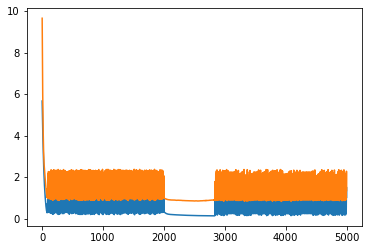

In [12]:

plt.plot(gradient_plot)
plt.plot(err_plot)